In [203]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import time      # for testing use only
import os         # for testing use only

import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.events import EventFiringWebDriver, AbstractEventListener
import urllib.request
from PyPDF2 import PdfFileReader
import time
import random
import math

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm





ריצה על האתר http://popvinyls.com/popvinyls-com-funko-pop-checklists

בעזרת הסלניום רצנו על האתר והורדנו ממנו את קיבצי הPDF

הורדנו את הPDF

לתקית הפרוייקט ונתנו לכל קובץ שם לפי השם של הקישור

In [2]:
url = "http://popvinyls.com/popvinyls-com-funko-pop-checklists/"
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Firefox(executable_path=r'C:\DRIVERS\geckodriver.exe', firefox_options=options)
driver.get(url)
response = requests.get(url,headers={"User-Agent":"text/html"})

pdfArr = []
for a in driver.find_elements_by_xpath('.//a'):
    temp = a.get_attribute('href')
    if(type(temp) is str):
        if ".pdf" in temp:
            print(a.text)
            pdfArr.append(a.text)
            print(temp)
            response = urllib.request.urlopen(temp)
            file = open(a.text.split()[0] + ".pdf", 'wb')
            file.write(response.read())
            file.close()
            
            
            
            
            
            
            
            
print(pdfArr)  





<ipython-input-2-b899ec1d6e0d>:6: DeprecationWarning: use options instead of firefox_options
  driver = webdriver.Firefox(executable_path=r'C:\DRIVERS\geckodriver.exe', firefox_options=options)


MARVEL
http://popvinyls.com/wp-content/uploads/2019/06/Marvel-Pop-List-June-12-19-PDF.pdf
DC HEROES
http://popvinyls.com/wp-content/uploads/2019/06/DC-Heroes-Pop-List-June-12-19-PDF.pdf
DISNEY
http://popvinyls.com/wp-content/uploads/2019/07/Disney-Pop-List-June-12-19-PDF.pdf
STAR WARS
http://popvinyls.com/wp-content/uploads/2019/06/SW-Pop-List-June-12-19-PDF.pdf
TELEVISION
http://popvinyls.com/wp-content/uploads/2019/06/Television-Pop-List-June-13-19-PDF.pdf
MOVIES
http://popvinyls.com/wp-content/uploads/2019/06/Movies-Pop-List-June-15-19-PDF.pdf
HARRY POTTER/FANTASTIC BEASTS
http://popvinyls.com/wp-content/uploads/2019/06/Harry-Potter-Fantastic-Beasts-June-13-19.pdf
BOOKS
http://popvinyls.com/wp-content/uploads/2019/06/Books-Pop-List-June-12-19-PDF.pdf
ANIMATION & SOUTH PARK
http://popvinyls.com/wp-content/uploads/2018/01/Animation-Pop-List-Jan-20-18-PDF.pdf
WWE and WRESTLING
http://popvinyls.com/wp-content/uploads/2019/06/WWE-Pop-List-June-12-19-PDF.pdf
GAME OF THRONES
http://popviny

רצנו על הקבצים ובעזרת פונקציות קריאה מקובץ שאבנו את הטקסט וחילקנו את האובייקטים(הפופים) לתאים במערך

In [257]:
final = []

for k in pdfArr:
    with open(k.split()[0]+".pdf", 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()
        page = []
        for i in range(1,number_of_pages):
            first_page = pdf.getPage(i)
            page.append(first_page.extractText())

    
    for i in range(len(page)):
        page[i] = page[i].replace("!","").replace(":","")
        page[i] = page[i].replace("\n"," ").replace(" (","(").replace(" <","<").split("  ")
       
    for i in range(len(page)):
        for ele in page[i]:
            ele = ele.lstrip(' ')
            #print(ele)
            if ele and ele != '!':
                if ele[0]=='!':
                    if(" " in ele):
                        ele = ele.split(" ", 1)[1]
            if not ele.isdecimal() and ele:
                    final.append((ele,pdfArr[i]))


[('01 Thor', 'MARVEL'), ('02 Loki', 'MARVEL'), ('03 Spider -man', 'MARVEL'), ('03 B&W Spider -man(Fugitive)', 'MARVEL'), ('03 Metallic Spider -man(SDCC Õ11)', 'MARVEL'), ('03 Red/Black Spider -man(HT)', 'MARVEL'), ('04 Iron Man', 'MARVEL'), ('04 Blue Stealth Iron Man (R.I.CC 14)', 'MARVEL'), ('05 Wolverine', 'MARVEL'), ('05 B&W Wolverine (Fugitive)', 'MARVEL'), ('05 Classic Brown Wolverine(Zapp)', 'MARVEL'), ('05 XForce Wolverine(HT)', 'MARVEL'), ('06 Captain America', 'MARVEL'), ('06 B&W Captain America(Gemini)', 'MARVEL'), ('06 Metallic Captain America(SDCC Õ11)', 'MARVEL'), ('06 Unmasked Captain America(Comikaze)', 'MARVEL'), ('06 Metallic Unmasked Capt. America(PC)', 'MARVEL'), ('07 Red Skull', 'MARVEL'), ('08 The Hulk', 'MARVEL'), ('09 The Thing(Blue Eyes)', 'MARVEL'), ('09 The Thing(Black Eyes)', 'MARVEL'), ('09 B&W Thing(Gemini)', 'MARVEL'), ('09 Metallic The Thing(SDCC 11)', 'MARVEL'), ('10 Captain America <Avengers>', 'MARVEL'), ('11 Iron Man<Avengers>', 'MARVEL'), ('12 Thor<A

בניית הטבלה בעזרת המערכים שקיבלנו מהקבצים
הפרדה של המספר הסידורי מהשם של הפופ
כמו כן מציאה האם הפופ אקסלוסיבי או מיוחד או רגיל

In [4]:
#print(final)
#create csv
cols = ["num","name","series","subseries","original price"] #"chase","exclusive","convention","size"
name = ''
num = 0
series = ""
subseries = "None"
chase = 0
exclusive= 0
convention = 0
original = 0
size = 0
flag = 1
temp = ''
df = pd.DataFrame(columns = cols)
for element in final:
    ele = element[0]
    if " " in ele:
        flag = 1
        if ele[0].isdigit():
            temp = ele.split(" ", 1)
            print(temp)
            num = temp[0]
            name = temp[1]

        elif ele.isupper() and len(ele)>5:
            flag = 0
            subseries = ele
        else:
            num = "None"
            name = ele

        if "CC" in ele:
             convention = 1
        else:
            convention = 0

        if "(" in ele and "CC" not in ele:
            exclusive = 1
        else:
            exclusive = 0

        if "*" in ele:
            chase = 1
        else:
            chase = 0


        if ("Pack" in ele or "6" in temp[1] or "10" in temp[1]) and "16" not in temp[1]:
            size = 1
            if "pack" in ele:
                original = 15
            if "6" in temp[1]:
                original = 20
            if "10" in temp[1]:
                original = 40
        else:
            size = 0
            original = 10

        if flag == 1:
            new_rows = {"num":num,"name":name,"series":element[1],"subseries":subseries,"convention":convention,"exclusive":exclusive,"chase":chase ,"size":size,"original price":original}
            df = df.append(new_rows,ignore_index=True)
df.to_csv("test.csv")
df










['01', 'Thor']
['02', 'Loki']
['03', 'Spider -man']
['03', 'B&W Spider -man(Fugitive)']
['03', 'Metallic Spider -man(SDCC Õ11)']
['03', 'Red/Black Spider -man(HT)']
['04', 'Iron Man']
['04', 'Blue Stealth Iron Man (R.I.CC 14)']
['05', 'Wolverine']
['05', 'B&W Wolverine (Fugitive)']
['05', 'Classic Brown Wolverine(Zapp)']
['05', 'XForce Wolverine(HT)']
['06', 'Captain America']
['06', 'B&W Captain America(Gemini)']
['06', 'Metallic Captain America(SDCC Õ11)']
['06', 'Unmasked Captain America(Comikaze)']
['06', 'Metallic Unmasked Capt. America(PC)']
['07', 'Red Skull']
['08', 'The Hulk']
['09', 'The Thing(Blue Eyes)']
['09', 'The Thing(Black Eyes)']
['09', 'B&W Thing(Gemini)']
['09', 'Metallic The Thing(SDCC 11)']
['10', 'Captain America <Avengers>']
['11', 'Iron Man<Avengers>']
['12', 'Thor<Avengers>']
['13', 'The Hulk<Avengers>']
['14', 'Nick Fury<Avengers>']
['15', 'Amazing Spider -man']
['15', 'GITD Spider -man(Gemini)']
['15', 'GITD Spider -man(Japan Exc)']
['15', 'Metallic Spider -

['227', 'GITD Vulture(GS)']
['230', 'X -23(TRU)']
['230', 'Deadpool the Duck(Walgreens)']
['231', 'Red She Hulk(SD CC)']
['232', 'Selfie Gwenpool(SDCC)']
['233', 'Superior Spider -man']
['234', 'Venom(HT)']
['235', 'Old Man Logan']
['236', 'Gold ÒThe CollectorÓ(DisneyParks)']
['237', 'Deadpool Ve nom(PiaB)']
['238', 'Iron Man(Tales of Suspense)(MCC)']
['239', 'Vision Avengers #57(MCC)']
['240', 'Thor']
['241', 'Gladiator']
['241', '10Ó Gladiator Hulk(Target)']
['242', 'Loki']
['243', 'Hela']
['244', 'Valkryie']
['245', 'Heimdall']
['246', 'Long Hair Thor(HT)']
['247', 'Thor Ragnorak Helmet(MCC)']
['248', 'Ragnorak Loki(MCC)']
['249', 'Hulk(Walmart)']
['250', 'Bruce Banner(TRU)']
['251', 'Hela(Target)']
['252', 'Surtur(GS)']
['253', 'Casual Hulk']
['254', 'Grandmaster']
['255', 'Medusa(HT)']
['256', 'Maximus']
['257', 'Flocked Lockjaw']
['259', 'Upside -Down Spider -Man']
['260', 'Groot w/ Cassette (MCC)']
['261', 'Star Lord(Walmart)']
['262', 'Drax with Groot(FYE)']
['263', 'Groot(TRU)

['494', 'Nova(PX)']
['10)', 'Blue Metallic Batman Clamshell(SDCC 10)']
['01', 'Batman']
['01', 'Metallic Batman']
['01', 'Blue Retro Batman(SDCC 10)']
['01', 'Metallic Blue Retro Batman(SDCC 10)']
['01', 'Error Yellow S ymbol Batman']
['01', 'Error Metallic Yellow Symbol Batman']
['01', 'Flashpoint Batman(NYCC 2011)']
['01', 'Bobblehead Batman(TARGET)']
['01', 'Metallic Bobblehead Batman']
['01', 'Yellow Rainbow Batman(Ent']
['01', 'Pink']
['01', 'Green Rainbow Batman(Ent']
['01', 'Orange Rainbow Batman(Ent']
['01', 'Blue Ra inbow Batman(Ent']
['01', 'Purple Rainbow Batman(Ent']
['01', 'New 52 Batman(PX)']
['01', 'Silver Batman LE 108(HT Employees)']
['01', 'Retro Batman(Ent Earth)']
['01', 'ÒMi chael KeatonÓ Batman(Gamestop)']
['01', 'GOLD ÒMKÓ Batman(Gamestop ) 01 Rainbow Batman']
['01', 'Harvest Batman(Funkoween Fright']
['01', 'GITD Silhouette Batman(Ent Earth)']
['02', 'Robin']
['02', 'Metallic Robin']
['02', 'Bobblehead Robin(TARGET)']
['02', 'Metallic Bobblehead Robin(TARGET)']


['157', 'BTAS Poison Ivy']
['158', 'Red Sonja']
['158', 'Bloody Red Sonja(PX)']
['159', 'Classic Superman(LOC)']
['161', 'Negative Batman(Target)']
['162', 'Professor Radium Batman(Target)']
['163', 'Golden Midas Batman(Target)']
['164', 'North Pole Camo Batman(Target)']
['165', 'Plastic Man(LOC)']
['166', 'Bombshell Harley Quinn']
['166', 'Grayscale Harley Quinn(Thinkgeek)']
['166', 'Christmas Harley Quinn(BL)']
['167', 'Bombshell Sepia Wonder Woman']
['167', 'Christmas Colors Wonder Woman (Michaels)']
['168', 'Bombshell Batgirl']
['169', 'Bombshell Katana']
['170', 'Bombshells Joker(HT)']
['170', 'Bombshells B&W Joker(HT)']
['171', 'Poison Ivy(HT)']
['172', 'Wonder Woman Movie']
['173', 'WWM Steve Trevor']
['174', 'WWM Hippolyta']
['175', 'WWM Action Pose Wonder Woman (Walmart)']
['177', 'WWM Blue Dress Wonder Woman (Gamestop)']
['178', 'WWM Wonder Woman(HT)']
['179', 'Emerald City Crusader(ECCC)']
['179', 'GITD Emerald City Crusader(ECCC)']
['180', 'John Stewart Green Lantern(Walgre

['117', 'Young Anna']
['118', 'Coronation Elsa']
['119', 'Coronation Anna']
['120', 'Summer Olaf']
['121', 'Elsa w/ Orb & Sceptor']
['122', 'U pside Down Olaf']
['124', 'Lilo']
['125', 'Stitch 626']
['126', 'Scrump']
['127', 'Elvis Stitch(HOT TOPIC)']
['128', 'Lightning McQueen']
['128', 'Dinoco Lightning McQueen']
['15)', 'LE 1008']
['129', 'Mater']
['129', 'Dinoco Mater(Fugitive']
['130', 'Doc Hudson']
['131', 'Ramone']
['131', 'Green Ramone(Target)']
['132', 'Inside Out Joy']
['132', 'Sparkle Hair Joy(SDCC 15)']
['133', 'Inside Out Sadness']
['133', 'Glitter Hair Sadness(SDCC 15)']
['134', 'Inside Out Disgust']
['135', 'Inside Out']
['136', 'Inside Out']
['136', 'Fire Head Anger(SDCC 15) LE 1008']
['136', 'Crystal Anger(Ent Earth']
['137', 'Inside Out Bing Bong']
['137', 'Clear Bing Bong(HT)']
['138', 'Cinderella *Live Action*']
['139', 'Gus Gus in Glas s Slipper']
['139', 'Glitter Gus Gus in Glass Slipper(HT)']
['140', 'Young Frank Walker']
['141', 'Frank Walker']
['142', 'David Ni

['399', 'Mrs. Who']
['400', 'Earth Day Wall -E(BL)']
['401', 'Monster Jack -Jack(Funko -Shop)']
['402', 'Fire Jack -Jack(Target)']
['403', 'Elastigirl(Target)']
['404', 'Edna Jack Jack(SDCC)']
['405', 'Jack -Jack in Diaper(FYE)']
['406', 'Lock']
['407', 'Shock']
['408', 'Barrel']
['409', 'Movie Moments AladdinÕs 1 st Wish']
['410', 'Doug Funnie']
['411', 'Patti Mayonnaise']
['412', 'Porkchop']
['413', 'Quail Man(TRU)']
['414', 'Quail Dog(HT)']
['415', 'Skeeter Valentine(SDCC 18)']
['416', 'Finding Your Voice Ariel(HT)']
['417', 'Moana']
['418', 'Grandma Tala']
['419', 'Te K a']
['420', 'Te Fiti']
['421', 'Tamatoa']
['422', 'Pua Hei Hei(Amazon)']
['423', 'Redd POTC(DP)']
['424', 'Powerline(HT)']
['425', 'Steamboat Willie']
['426', 'Apprentice Mickey']
['427', 'Firefighter Mickey']
['428', 'Conductor Mickey']
['429', 'Brave Little Tailor']
['430', 'Band Leader Mickey']
['431', 'Plane Crazy Mickey']
['432', 'Little Whirlwind Mickey(NYCC 18)']
['433', 'Winifred Sanderson']
['434', 'Sarah S

['89', 'FA Tie Fighter Pilot(SmugglerÕs']
['90', 'FA Red Stripe Tie Fighter Pilot (SmugglerÕs Bounty)']
['90', 'Ceremonial Luke Skywalker']
['91', 'Chrome Captain Phasma(SmugglerÕs']
['91', 'Ceremonial Han Skywalker']
['92', 'AT-AT Dr iver(Walgreens)']
['93', 'Bespin Luke Skywalker']
['94', 'One Handed Bespin Luke']
['95', 'Ree Yees(Walgreens)']
['96', 'Kit Fisto(Walgreens)']
['97', 'Plo Koon(Walgreens)']
['98', 'Blue Senate Guard']
['99', 'Old Ben Kenobi(SmugglerÕs Bounty)']
['100', 'Blood Smear FN -2187(Target)']
['101', '4-Lom']
['102', 'Boba Fett(SmugglerÕs Bounty)']
['103', 'IG -88(SmugglerÕs Bou nty)']
['104', 'Rey with Lightsaber']
['105', 'Kylo Ren with Lightsaber']
['106', 'Force Awakens Luke Skywalker']
['107', 'General Leia']
['108', 'Maz Kanata']
['109', 'General Hux']
['110', 'Snap Wexley']
['111', 'FN -2199']
['112', 'Guavian']
['113', 'ME -809']
['114', 'Rey(Walgreens)']
['115', 'Han Solo w/ ChewieÕs Bowcaster (SDCC 16)']
['116', 'Thumbs']
['117', 'Poe Dameron(HT)']
['11

['33', 'Flocked Jake *AT*(TOY WARS)']
['34', 'Ice King *AT*']
['35', 'Glenn *TWD*']
['35', 'Bloody Glenn(MAN OF ACTION )']
['36', 'Tank Zombie *TWD*']
['36', 'Bloody Tank Zombie(FUGITIVE)']
['37', 'MichonneÕs Pet #1 *TWD*']
['37', 'Bloody MichonneÕs Pet #1 (HarrisonÕs)']
['38', 'Michonne *TWD*']
['38', 'Bloody Michonne(HARRISONÓS)']
['39', 'Bloody MichonneÕs Pet #2 (HarrisonÕs)']
['40', 'Beavis']
['41', 'Butt head']
['42', 'Amy Fa rrah Fowler BBT']
['42', 'Pink Shirt Amy Farrah Fowler(JMD)']
['43', 'Dr. Blake Downs *ChildrenÕs']
['44', 'Zombie Jake *AT*(SDCC 2013)']
['45', 'Leonard Hofstadter *BBT*']
['46', 'Muscle Man *The Regular Sh ow*']
['47', 'Moredecai *The Regular ShowÓ']
['48', 'Benson *The Regular Show*']
['49', 'Skips *The Regular Show*']
['50', 'Muscle Man *The Regular Show*']
['51', 'Princess Bubblegum *AT*']
['51', 'Glow Princess Bubblegum(SDCC Ô14)']
['52', 'BMO *AT*']
['52', 'Glow BMO(SDCC 2014)']
['52', 'Metallic BMO(HOT TOPIC)']
['53', 'Lemongrab *AT*']
['54', 'Fionna 

['251', 'Jamie Frasier']
['252', 'Dougal MacKenzie']
['253', 'Frank Randall']
['254', 'Black Jack Randall']
['255', 'Lt. Starbu ck']
['256', 'Six']
['257', 'Cylon Centurion']
['258', 'Helena in Parka(SDCC 15)']
['259', 'Dalek SEC(B&N)']
['260', 'Island Scarred Oliver Queen(Fugitive)']
['261', 'Rachel Green']
['262', 'Ross Geller']
['263', 'Monica Geller']
['264', 'Chandler Bing']
['265', 'Joey Tribbiani']
['266', 'Phoebe Buffay']
['267', 'Emma Swan']
['268', 'Regina']
['268', 'Metallic Purple Regina(BoxLunch)']
['269', 'Snow White']
['270', 'Prince Charming']
['271', 'Rumplestiltskin']
['272', 'Captain Hook']
['273', 'Felix']
['274', 'Regina w ith Heart(SDCC 15) LE']
['275', 'Evolving Dalek SEC(Gamestop)']
['276', 'Robot GIR']
['277', 'GIR with Cupcake']
['277', 'Invader ZimÕs GIR']
['279', 'Dr. Goodweather']
['280', 'Abraham']
['281', 'Vaun']
['282', 'The Master']
['283', 'BMO Noire(HT)']
['284', 'Sherlock Holmes']
['285', 'Dr.John Watson']
['286', 'Jim Moriar ty']
['287', 'Mycroft Ho

['551', 'Max']
['552', 'Masked Max(HT)']
['553', 'CBM Walt Flanagan LE 120(FHQ)']
['554', 'CBM Mike Zapcic LE 120(FHQ)']
['555', 'CBM Bryan Johnson LE 120(FHQ)']
['556', 'CBM Ming Chen LE 120(FHQ)']
['557', 'CBM Kevin Smith LE 500(FHQ)']
['558', 'Bob Ross w/ Raccoon']
['559', 'Bob Ross w/ Paintbrush']
['560', 'Bob Ross w/ PeaPod(Target)']
['561', 'Bob Ross w/ Hoot *Chase*']
['562', 'Battle Armor He -Man']
['563', 'Battle Armor Skeletor']
['565', 'Evil Lyn']
['566', 'Orko']
['567', 'Stratos']
['568', 'Flocked Moss Man(TRU)']
['569', 'Faker(Target)']
['570', 'Sprocket(TRU)']
['571', 'Uncle Traveling Ma tt(Specialty']
['572', 'Eleven w/ Brown Hair Waffles(BL)']
['573', 'Tygra(Specialty Series)']
['573', 'Negan']
['574', 'Ezekiel']
['575', 'Richard']
['576', 'Eugene']
['577', 'Sasha']
['578', 'Daryl(FYE)']
['579', 'Zombie Sasha']
['580', 'Robin as Nightwing']
['581', 'Starfire as Batgirl']
['582', 'Rose Wilson(TRU)']
['583', 'Robin with Red']
['584', 'Mammoth']
['585', 'Robin as Red X Unma

['35', 'Carl']
['35', 'GITD Carl (SDCC 13)']
['35', 'Mustache Carl(EE)']
['35', 'Purple Carl(EE)']
['36', 'Dave']
['36', 'Purple Dave']
['36', 'Metallic Dave(SDCC 13)']
['37', 'Evil Minion']
['37', 'Me tallic Evil Minion(SDCC 13)']
['38', 'Tin Man']
['39', 'Scarecrow']
['40', 'Cowardly Lion']
['40', 'Flocked Cowardly Lion(Gemini)']
['41', 'Glinda the Good Witch']
['42', 'Jay']
['43', 'Silent Bob']
['44', 'Invisible Bilbo Baggins']
['45', 'Gandalf(no hat)']
['46', 'Legolas']
['46', 'ÒBlue EyedÓ Legolas(HT)']
['47', 'Thorin Oakenshield(Hobbit)']
['48', 'Azog']
['49', 'Marty McFly']
['50', 'Dr. Emmett Brown']
['51', 'Ghostface']
['52', 'Billy']
['52', 'GITD Bloody Billy(SDCC 14)']
['53', 'Ash']
['54', 'Deadite']
['54', 'GITD Deadite(Bangkok Comic Con)']
['55', 'Pennywise']
['56', 'Chucky']
['56', 'Bloody Chucky(HT)']
['57', 'Sam']
['58', 'Captain Spaulding']
['59', 'Ender']
['60', 'Petra']
['61', 'Vincent Vega']
['61', 'Bloody Vincent Vega(SDCC 14)']
['61', 'Marty']
['62', 'Jules']
['62',

['336', 'Yellow Shirt Scott Pilgrim w/Guitar (SDC C)']
['339', 'Jen']
['340', 'Kira and Fizzgig']
['341', 'Aughra']
['342', 'The Chamberlain Skeksis']
['343', 'Ursol the Chanter']
['344', 'Paul Feig LE 200']
['345', 'Ellen Ripley']
['346', 'Alien Queen 6Ó']
['347', 'Captain Kirk']
['348', 'Spock']
['349', 'Bones']
['350', 'Sulu']
['351', 'Chekov']
['352', 'Scotty']
['353', 'Uhura']
['354', 'Survival Suit Capt. Kirk(FYE)']
['355', 'Chekov Survival Suit']
['356', 'Jaylah']
['357', 'Krall']
['358', 'Alex DeLarge']
['359', 'Masked Alex DeLarge(HT)']
['360', 'GITD Pinhead(HT)']
['361', 'Jason Voorhees(HT)']
['362', 'Beetlejuice(HT)']
['363', 'Sarah and Worm']
['364', 'Jareth']
['365', 'Jareth(H T)']
['366', '6Ó Ludo']
['367', 'Hoggle']
['368', 'William Wallace']
['368', 'Bloody William Wallace(FYE)']
['369', 'Frankie Stein']
['370', 'Draculaura']
['371', 'Clawdee n Wolf']
['372', 'Cleo De Nile']
['373', 'Lagona Blue']
['374', 'Skelita Calaveras']
['375', 'Aguilar']
['376', 'Maria']
['377', 

['643', 'Red Suit Austin Powers(GS)']
['644', 'Dr. Evil']
['645', 'Vanessa Kensington']
['647', 'Nacho Libre']
['647', 'Masked Nacho Libre *CHASE*']
['649', 'Beast']
['650', 'Kubo']
['651', 'Kubo w/ Helmet']
['652', 'Monkey']
['653', 'Baby Audrey(Target)']
['654', 'Audrey II']
['654', 'Bloody Audrey II *Chase*']
['655', 'Seymour']
['656', 'Audrey']
['657', 'Orin']
['658', 'Chucky on Cart(HT)']
['659', '2018 Grinch Movie The']
['660', 'Max the Dog']
['661', 'Cindy Lou Who']
['662', 'Young Grinch']
['663', 'Grinch in Scarf(Walmart)']
['664', 'Grinch in Underwear(Gamestop)']
['665', 'Max with Antle rs(FYE)']
['666', 'Guillermo del Toro']
['667', 'John McLane']
['668', 'Al Powell']
['669', 'Hans Gruber']
['670', 'Hans Gruber Hands in Pocket(GS)']
['671', 'Tony Vlesko']
['672', 'Shirt less John McLane(Target)']
['673', 'Chuck Norris(Target)']
['674', 'Billy Ray Valentine']
['675', 'Louis Winthrope III']
['676', 'Special Agent Orange']
['677', 'Santa Louis']
['678', 'Haggard Louis Wintrope I

['35', 'Robot Devil w/ Fiddle(SDCC 15)']
['36', 'Secret Squirrel']
['37', 'Morocco Mole']
['38', 'Dirk Dastardly']
['39', 'Muttley']
['39', 'Flocked Muttley']
['40', 'Lil']
['40', 'Orange Lil Gruesome(SDCC 15)']
['40', 'Green Lil Gruesome(SDCC 15) LE 500']
['40', 'Yellow Little Gruesome(SDCC 15)']
['40', 'Red Lil Gruesome(SDCC 15) LE 500']
['40', 'Holiday Lil Gruesome LE 500(Funko -Shop)']
['41', 'Giganto']
['42', 'Snake Eyes']
['43', 'Storm Shadow']
['43', 'White Storm Shadow']
['44', 'Cobra Commadner']
['45', 'Roadblock']
['46', 'Hooded Cobra Commander']
['47', 'Golden Frieza(SDCC 15)']
['47', 'Red Eyes Golden Frieza(SDCC)']
['48', 'Charlie Brown']
['49', 'Snoopy and Woodstock']
['59', 'Flocked Snoopy and Woodstock']
['50', 'Linus']
['51', 'Lucy']
['52', 'Sally']
['53', 'Olaf']
['54', 'Professsor Farnswo rth']
['55', 'Zoidberg']
['55', 'Blue Zoidberg(HT)']
['56', 'Nibbler']
['57', 'Za pp Brannigan']
['58', 'Doraemon']
['59', 'Ichigo']
['60', 'Rukia']
['61', 'Ken Kaneki(HT)']
['62', '

['308', 'Daffy Duck']
['309', 'Sylvester w/ Tweety']
['310', 'Elmer Fudd Viking']
['311', 'Bugs Bunny Opera']
['312', 'Taz']
['313', 'Future Trunks']
['314', 'Goku Black']
['316', 'Zamasu']
['317', 'Whis']
['320', 'Rocko w/ Spunko']
['320', 'Rocky w/ Red Snout *Chase*']
['321', 'Heffer']
['321', 'ÒBooÓ Heffer *Chase*']
['322', 'Norbert']
['323', 'Daggett']
['324', 'Arnold Shortman']
['325', 'Helga Pataki']
['326', 'Gremlin(FS) LE 3000']
['327', 'Roronoa Zoro']
['328', 'Nami']
['329', 'Franky']
['330', 'Bea Hancock']
['331', 'Sailor Moon(BL)']
['332', 'Pickle Rick w/ Laser']
['333', 'Pickle Rick']
['334', 'Cornveilious Daniel']
['335', 'Toxic Rick(Target)']
['336', 'Toxic Morty(Target)']
['339', 'Prison Break Rick']
['340', 'Sentient Arm Morty']
['340', 'Bloody Sentient Arm Morty *Chase*']
['341', 'Warrior Summer']
['342', 'Hemorrage']
['343', 'Facehugger Rick(GS)']
['346', 'Squanchy w/ Rope']
['352', 'Tenderheart Bear']
['353', 'Grumpy Bear']
['354', 'Love -A-Lot Bear']
['355', 'Good L

['65', 'Beige Sweater Kurt Cobain(FYE)']
['66', 'Le ather Jacket Kurt Cobain(HT)']
['68', 'Alice Cooper Top Hat']
['69', 'Alice Cooper(HT)']
['70', 'Motley Crue']
['71', 'Motley Crue']
['72', 'Motley Crue']
['73', 'Motley Crue Tommy Lee']
['74', 'Weird Al Yankovic']
['75', 'Weird Al ÒEat ItÓ(FYE)']
['76', 'Ed Sheeran']
['77', 'Notorious BIG w/Crown']
['78', 'Notorious BIG w/Shades']
['79', 'Purple Rain Prince']
['79', 'Glitter Purple Rain(FYE)']
['80', 'Around the World in a Day Prince']
['81', 'Third Eye Girl Prince']
['83', 'Mark Hoppus Blink 182']
['84', 'Travis Barker Blink 182']
['85', 'All I Want for Christmas Mariah Carey']
['87', '']
['89', 'Lady Justice']
['90', 'ÒHit Me BabyÓ Britney Spears(Target)']
['91', 'Black Jacket Angus Young']
['91', 'Blue Jacket & Ha t w/Horns Angus Lee']
['91', 'Red Jacket Angus Young(FYE)']
['92', 'Freddie Mercury']
['93', 'Brian May']
['94', 'Roger Taylor']
['95', 'John Deacon']
['96', 'Gold JacketFreddie Mercury']
['97', 'Shirtless Freddie Mercur

['140', 'Green Blanka(Walmart)']
['141', 'Balrog']
['142', 'Dan']
['143', 'John So ap McTavish']
['144', 'All Ghillied Up']
['145', 'Juggernaut']
['146', 'Riley']
['147', 'Toasted Monkey Bomb(GS Powerup']
['147', 'Monkey Bomb']
['148', 'Spaceland Zombie']
['149', 'Geralt']
['150', 'Ciri']
['151', 'Eredin']
['152', 'Yennefer']
['153', 'Triss']
['154', 'Hot Ryu']
['155', 'Jill Valentine']
['156', 'Leon S Kennedy']
['157', 'Nemesis']
['158', 'Licker']
['159', '6Ó Tyrant']
['159', 'GITD Tyrant(Target)']
['160', '6Ó Hunter']
['161', 'Sweet Tooth']
['162', 'Nick Valentine']
['163', 'Cogsworth']
['163', 'Cogsworth(Target)']
['164', 'Piper']
['165', 'Paladin Danse']
['166', 'X-01 Power Armor']
['167', 'Liberty Prime']
['168', 'Lara Croft']
['169', 'Q*Bert']
['170', 'Liberty Prime Battle(GS)']
['171', 'Heihachi']
['172', 'Tekken King']
['173', 'Jin Kazama']
['174', 'Nina Williams']
['175', 'Kazuya']
['176', 'Devil Jin']
['177', 'Pink D.Va']
['177', 'D.Va(Blizzard)']
['177', 'Blue D. Va with Mek

['20', 'Harry and Hogwarts Express Engine']
['21', 'Ron w/ Hogwarts Express Car']
['22', 'Hermione w/ Hogwarts Express Car']
['23', 'New Ghostbusters Ecto -1']
['24', 'Ecto -1 w/Slimer(SDCC']
['25', 'B.A. Baracus A -Team Van']
['25', 'Marvin the Martian w/Rocket(Funko -Shop) LE 3000']
['26', 'WolverineÕs Motorcycle(MCC)']
['28', 'The Flintmobile w/Dino(Funko -Shop)']
['29', 'Hong Kong Phooey Phoeeymobile']
['32', 'Baby with Dean(SDCC 18)']
['33', 'Ghost Rider(PX)']
['33', 'GITD Ghost Rider(PX)']
['34', 'RickÕs Shiop(HT)']
['35', 'Stitch with Red One(Box Lunch']
['36', 'Deadpool on Unicorn(MCC)']
['37', 'Mad Max Rick']
['38', 'Orville(Disney Treasures)']
['39', 'Dr. Sattler with Jeep']
['40', 'Express Trip Tina w/ Unicorn (SDCC18)']
['41', 'Zim and Girl on The Pig(HT)']
['42', 'The Nux Car']
['43', 'Hercules and Pegasus']
['44', 'James Bond with Ashton Martin']
['45', 'Elastigirl on Elastibike']
['46', 'Baby with Sam']
['46', 'Chrome Baby with Sam *CHASE* (HT)']
['47', 'Splash Mountain(

['24', 'Ken Griffey Jr Stadium18976']
['24', 'Ken Griffey Jr Rookie Jersey Stadium']
['1000', '']
['24', 'Bronze Ken Griffe y Jr Stadium 24']
['01', 'Conor McGregor']
['01', 'White Trunks Conor McGregor(UFC)']
['02', 'Ronda Rousey']
['03', 'Chris Weidman']
['04', 'Jose Aldo']
['05', 'Anderson Silva']
['06', 'BJ Penn']
['01', 'David De Gea']
['02', 'Romelu Lukaku']
['03', 'Zlatan Ibrahimovic']
['04', 'Pau l Pogba']
['05', 'Eden Hazard']
['06', 'David Luiz']
['07', 'Gary Cahill']
['08', 'Mohammed Salah']
['09', 'Roberto Firmino']
['10', 'Sadio Mane']
['12', 'Pierre -Emerick Aubameyang']
['14', 'Kevin De Bruyne']
['01', 'Count Chocula']
['01', 'Metallic Count Chocula(SDCC 11)']
['02', 'Franken Berry']
['02', 'Metallic Franken Berry(SDCC 11)']
['03', 'Boo Berry']
['03', 'Metallic Boo Berry(SDCC 11)']
['03', 'GITD Boo Berry(SDCC 11 PreBuy)']
['04', 'Big Boy LE 480(SDCC 16)']
['05', 'Target Bullseye Dog']
['01', 'Siberian Husky']
['02', 'German Shepherd']
['03', 'Dachshund']
['04', 'French B

,num,name,series,subseries,original price,chase,convention,exclusive,size
0,01,Thor,MARVEL,None,10,0.0,0.0,0.0,0.0
1,02,Loki,MARVEL,None,10,0.0,0.0,0.0,0.0
2,03,Spider -man,MARVEL,None,10,0.0,0.0,0.0,0.0
3,03,B&W Spider -man(Fugitive),MARVEL,None,10,0.0,0.0,1.0,0.0
4,03,Metallic Spider -man(SDCC Õ11),MARVEL,None,10,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6181,02,Otto Blue Shirt(SDCC 16) LE 3000,DC HEROES,LE 3000,10,0.0,1.0,0.0,0.0
6182,02,Otto Orange Shirt(SDCC 16) LE 480,DC HEROES,LE 3000,10,0.0,1.0,0.0,0.0
6183,02,O tto Red Shirt(SDCC 16) LE 480,DC HEROES,LE 3000,10,0.0,1.0,0.0,0.0
6184,03,El Diablo LE 3000(ECCC 17),DC HEROES,LE 3000,10,0.0,1.0,0.0,0.0


ביצוע קרולינג כדי למצוא מחיר עדכני בשוק
אשר מבוצע על ידי שירשור של המספר הסידורי והשם של הפופ לתוך כתובת האתר

In [5]:
#get current price


def getPrice(df):
    options = Options()
    options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
    driver = webdriver.Firefox(executable_path=r'C:\DRIVERS\geckodriver.exe', options=options)
    
    names = df["name"]
    id = df["num"]
    temp = ""
    arr = []
    for i in range(len(names)):
        time.sleep(3)
        if id[i] != "None":
            temp = id[i]+"+"
        else:
            temp = ""
        if "(" in names[i]:
            temp += names[i][0:names[i].index("(")].replace(" ","+").replace("&","%26")
        else:
            temp += names[i].replace(" ","+").replace("&","%26")
        url = "https://mavin.io/search?q="+temp+"&bt=sold"
        print(url)
        try:
            driver.get(url)
            temp = driver.find_element_by_class_name('estimate-wrap').text
        except:
            temp = '0'
        print(temp)
        arr.append(temp.replace("WORTH","")[2:])
        time.sleep(3)
        try:   
            driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + 'w')
        except:
            time.sleep(1)
        time.sleep(1)

        
    df["current price"] = arr
    df.to_csv("test.csv")
getPrice(df)




https://mavin.io/search?q=01+Thor&bt=sold
WORTH
$248.09
https://mavin.io/search?q=02+Loki&bt=sold
WORTH
$280.56
https://mavin.io/search?q=03+Spider+-man&bt=sold
WORTH
$10.91
https://mavin.io/search?q=03+B%26W+Spider+-man&bt=sold
WORTH
$0
https://mavin.io/search?q=03+Metallic+Spider+-man&bt=sold
WORTH
$0
https://mavin.io/search?q=03+Red/Black+Spider+-man&bt=sold
WORTH
$0
https://mavin.io/search?q=04+Iron+Man&bt=sold
WORTH
$23.54
https://mavin.io/search?q=04+Blue+Stealth+Iron+Man+&bt=sold
WORTH
$55.95
https://mavin.io/search?q=05+Wolverine&bt=sold
WORTH
$17.63
https://mavin.io/search?q=05+B%26W+Wolverine+&bt=sold
WORTH
$0
https://mavin.io/search?q=05+Classic+Brown+Wolverine&bt=sold
WORTH
$0
https://mavin.io/search?q=05+XForce+Wolverine&bt=sold
WORTH
$4.00
https://mavin.io/search?q=06+Captain+America&bt=sold
WORTH
$36.79
https://mavin.io/search?q=06+B%26W+Captain+America&bt=sold
WORTH
$0
https://mavin.io/search?q=06+Metallic+Captain+America&bt=sold
WORTH
$68.48
https://mavin.io/search?q=0

WORTH
$12.67
https://mavin.io/search?q=68+Gamma+Glow+Hulk&bt=sold
WORTH
$0
https://mavin.io/search?q=69+A2+Thor&bt=sold
WORTH
$0
https://mavin.io/search?q=70+A2+Hawkeye&bt=sold
WORTH
$0
https://mavin.io/search?q=71+A2+Vision&bt=sold
WORTH
$0
https://mavin.io/search?q=71+Faded&bt=sold
WORTH
$23.05
https://mavin.io/search?q=71+Metallic+Vision&bt=sold
WORTH
$18.31
https://mavin.io/search?q=72+A2+Ultron&bt=sold
WORTH
$0
https://mavin.io/search?q=73+A2+Hulkbuster&bt=sold
WORTH
$0
https://mavin.io/search?q=74+Yondu&bt=sold
WORTH
$26.19
https://mavin.io/search?q=75+Ronan&bt=sold
WORTH
$16.22
https://mavin.io/search?q=76+Nebula&bt=sold
WORTH
$15.86
https://mavin.io/search?q=77+The+Collector&bt=sold
WORTH
$12.27
https://mavin.io/search?q=78+6Ó+Thanos&bt=sold
WORTH
$0
https://mavin.io/search?q=78+GITD+6Ó+Thanos&bt=sold
WORTH
$0
https://mavin.io/search?q=79+Blacksuit+Spider+-man&bt=sold
WORTH
$0
https://mavin.io/search?q=79+GITD+Blacksut+Spider+-man&bt=sold
WORTH
$0
https://mavin.io/search?q=80+T

WORTH
$8.58
https://mavin.io/search?q=173+Gold+Levitating+D+octor+Strange&bt=sold
WORTH
$0
https://mavin.io/search?q=174+Doctor+Strange&bt=sold
WORTH
$21.49
https://mavin.io/search?q=175+Gold+Doctor+Strange&bt=sold
WORTH
$13.59
https://mavin.io/search?q=176+Kitty+Pride&bt=sold
WORTH
$28.98
https://mavin.io/search?q=177+Cable&bt=sold
WORTH
$10.70
https://mavin.io/search?q=178+Archangel&bt=sold
WORTH
$16.25
https://mavin.io/search?q=179+Quicksiver&bt=sold
WORTH
$0
https://mavin.io/search?q=180+Psylocke&bt=sold
WORTH
$28.81
https://mavin.io/search?q=181+Sabertooth&bt=sold
WORTH
$18.49
https://mavin.io/search?q=182+Storm+w/Mohawk&bt=sold
WORTH
$13.06
https://mavin.io/search?q=183+Chrome+Colossus&bt=sold
WORTH
$19.47
https://mavin.io/search?q=184+Emma+Frost&bt=sold
WORTH
$21.63
https://mavin.io/search?q=187+Scarlet+Spider&bt=sold
WORTH
$24.08
https://mavin.io/search?q=188+Iron+Fist+&bt=sold
WORTH
$19.89
https://mavin.io/search?q=188+Green/Yellow+Iron+Fist&bt=sold
WORTH
$15.25
https://mavin.

WORTH
$47.90
https://mavin.io/search?q=286+IW+GITD+Thor&bt=sold
WORTH
$0
https://mavin.io/search?q=287+IW+Iron+Spider&bt=sold
WORTH
$0
https://mavin.io/search?q=287+Red+Chrome+Iron+Spider&bt=sold
WORTH
$22.12
https://mavin.io/search?q=288+IW+Captain+America&bt=sold
WORTH
$237.90
https://mavin.io/search?q=289+IW+Thanos&bt=sold
WORTH
$10.14
https://mavin.io/search?q=289+Metallic+Thanos&bt=sold
WORTH
$22.45
https://mavin.io/search?q=289+Purple+Chrome+Thanos&bt=sold
WORTH
$20.20
https://mavin.io/search?q=289+Red+Chrome+Thanos&bt=sold
WORTH
$10.25
https://mavin.io/search?q=289+Orange+Chrome+Thanos&bt=sold
WORTH
$10.11
https://mavin.io/search?q=289+Green+Chrome+Thanos&bt=sold
WORTH
$10.47
https://mavin.io/search?q=289+Yellow+Chrome+Thanos&bt=sold
WORTH
$9.05
https://mavin.io/search?q=289+Blue+Chrome+Thanos&bt=sold
WORTH
$10.48
https://mavin.io/search?q=290+IW+Corvus+Glaive&bt=sold
WORTH
$0
https://mavin.io/search?q=291+IW+Ebony+Maw&bt=sold
WORTH
$0
https://mavin.io/search?q=292+IW+Pr+oxima+M

WORTH
$1.00
https://mavin.io/search?q=399+Christmas+Tr+ee+Groot&bt=sold
WORTH
$0
https://mavin.io/search?q=400+Deadpool+with+Candy+Canes&bt=sold
WORTH
$9.45
https://mavin.io/search?q=401+GITD+Anti+-Venom&bt=sold
WORTH
$0
https://mavin.io/search?q=402+Miles+Morales+Black+Suit&bt=sold
WORTH
$13.66
https://mavin.io/search?q=403+Unmasked+Miles+Morales&bt=sold
WORTH
$13.99
https://mavin.io/search?q=404+Peter+Parker+into+the+Spider+-verse&bt=sold
WORTH
$12.37
https://mavin.io/search?q=405+Spider+-Gwen&bt=sold
WORTH
$7.54
https://mavin.io/search?q=406+Spider+-man+Noir+Black+Hat&bt=sold
WORTH
$0
https://mavin.io/search?q=407+Prowler&bt=sold
WORTH
$9.48
https://mavin.io/search?q=408+Green+Goblin&bt=sold
WORTH
$15.54
https://mavin.io/search?q=408+10Ó+Green+Goblin&bt=sold
WORTH
$0
https://mavin.io/search?q=409+Spider+-man+Noir&bt=sold
WORTH
$0
https://mavin.io/search?q=410+Spider+-ham&bt=sold
WORTH
$33.90
https://mavin.io/search?q=411+Colossus&bt=sold
WORTH
$12.94
https://mavin.io/search?q=412+Do

WORTH
$197.13
https://mavin.io/search?q=Iron+Man/Spider+-man+2+Pack&bt=sold
WORTH
$0
https://mavin.io/search?q=Peter+Parker/Spider+-man+2+Pack&bt=sold
WORTH
$29.10
https://mavin.io/search?q=Groot+and+Rocket+2+Pack&bt=sold
WORTH
$24.46
https://mavin.io/search?q=Metallic+Thanos+with+Tshirt&bt=sold
WORTH
$25.00
https://mavin.io/search?q=Metallic+Black+Panther+with+Tshirt&bt=sold
WORTH
$0
https://mavin.io/search?q=Blue+Batman+Clamshell&bt=sold
WORTH
$0
https://mavin.io/search?q=10)+Blue+Metallic+Batman+Clamshell&bt=sold
WORTH
$0
https://mavin.io/search?q=Black+Batgirl+Clamshell&bt=sold
WORTH
$0
https://mavin.io/search?q=GITD+Gree+n+Lantern+Clamshell&bt=sold
WORTH
$0
https://mavin.io/search?q=01+Batman&bt=sold
WORTH
$22.58
https://mavin.io/search?q=01+Metallic+Batman&bt=sold
WORTH
$139.55
https://mavin.io/search?q=01+Blue+Retro+Batman&bt=sold
WORTH
$0
https://mavin.io/search?q=01+Metallic+Blue+Retro+Batman&bt=sold
WORTH
$0
https://mavin.io/search?q=01+Error+Yellow+S+ymbol+Batman&bt=sold
WOR

https://mavin.io/search?q=35+GITD+Darkseid&bt=sold
WORTH
$213.67
https://mavin.io/search?q=36+The+Joker+*Dark+Knight+Trilogy*&bt=sold
WORTH
$14.09
https://mavin.io/search?q=37+The+Joker/w+Clown+Mask&bt=sold
WORTH
$0
https://mavin.io/search?q=38+CANCELLED&bt=sold
WORTH
$6.59
https://mavin.io/search?q=39+Reverse+Flash&bt=sold
WORTH
$52.24
https://mavin.io/search?q=39+GITD+Reverse+Flash&bt=sold
WORTH
$312.45
https://mavin.io/search?q=40+Nightwing&bt=sold
WORTH
$20.83
https://mavin.io/search?q=40+Red+Nightwing&bt=sold
WORTH
$116.93
https://mavin.io/search?q=40+Metallic+Red+Nightwing&bt=sold
WORTH
$0
https://mavin.io/search?q=41+Classic+TV+Batman&bt=sold
WORTH
$17.35
https://mavin.io/search?q=41+Metallic+Classic+TV+Batman&bt=sold
WORTH
$102.99
https://mavin.io/search?q=42+C+lassic+TV+Robin&bt=sold
WORTH
$0
https://mavin.io/search?q=43+Classic+TV+Catwoman&bt=sold
WORTH
$20.53
https://mavin.io/search?q=44+Classic+TV+Joker&bt=sold
WORTH
$17.94
https://mavin.io/search?q=44+Classic+TV+Metallic+J

https://mavin.io/search?q=124+Harley+Quinn+Impopster+Batman&bt=sold
WORTH
$8.80
https://mavin.io/search?q=125+Scarecrow+Impopster+Batman&bt=sold
WORTH
$9.22
https://mavin.io/search?q=126+The+Riddler+Im+popster+Batman&bt=sold
WORTH
$0
https://mavin.io/search?q=127+Harley+Quinn+Impopster+Batgirl&bt=sold
WORTH
$8.14
https://mavin.io/search?q=128+Poison+Ivy+Impopster+Batgirl&bt=sold
WORTH
$8.75
https://mavin.io/search?q=129+Doomsday+6Ó&bt=sold
WORTH
$0
https://mavin.io/search?q=130+False+God+Superman&bt=sold
WORTH
$9.60
https://mavin.io/search?q=131+Underwater+Batm+an&bt=sold
WORTH
$0
https://mavin.io/search?q=132+Thomas+Wayne&bt=sold
WORTH
$17.49
https://mavin.io/search?q=133+SurfÕs+Up+Batman&bt=sold
WORTH
$0
https://mavin.io/search?q=134+SurfÕs+Up+Joker&bt=sold
WORTH
$0
https://mavin.io/search?q=135+Dr.+Harleen&bt=sold
WORTH
$43.82
https://mavin.io/search?q=136+Batgirl+of+Burnside&bt=sold
WORTH
$0
https://mavin.io/search?q=136+Catwoman&bt=sold
WORTH
$11.21
https://mavin.io/search?q=138+H

WORTH
$10.99
https://mavin.io/search?q=229+Sepia+Wonder+Woman+w/Cloak&bt=sold
WORTH
$11.50
https://mavin.io/search?q=&bt=sold
WORTH
$11.30
https://mavin.io/search?q=230+Diana+Prince&bt=sold
WORTH
$13.41
https://mavin.io/search?q=231+Lobo&bt=sold
WORTH
$13.39
https://mavin.io/search?q=231+Bloody+Lobo&bt=sold
WORTH
$14.31
https://mavin.io/search?q=232+Ace+the+Bat+Hound&bt=sold
WORTH
$107.11
https://mavin.io/search?q=233+Skull+Bags+Harley+Quinn&bt=sold
WORTH
$21.96
https://mavin.io/search?q=234+Death&bt=sold
WORTH
$1.31
https://mavin.io/search?q=235+Krypto+the+Superdog&bt=sold
WORTH
$14.65
https://mavin.io/search?q=236+RedHood&bt=sold
WORTH
$31.21
https://mavin.io/search?q=237+Kyle+Rayner+White+Lantern&bt=sold
WORTH
$18.13
https://mavin.io/search?q=237+GITD+Kyle+Rayner+White+Lantern+&bt=sold
WORTH
$23.33
https://mavin.io/search?q=238+Flashpoint+Wonder+Woman&bt=sold
WORTH
$12.63
https://mavin.io/search?q=239+Batman+Hush+Deluxe&bt=sold
WORTH
$31.35
https://mavin.io/search?q=240+Batman+Hush+

WORTH
$17.75
https://mavin.io/search?q=24+Steamboat+Willie&bt=sold
WORTH
$125.13
https://mavin.io/search?q=24+Metallic+Steamboat+Willie&bt=sold
WORTH
$0
https://mavin.io/search?q=25+Peter+Pan&bt=sold
WORTH
$71.53
https://mavin.io/search?q=26+Captain+Hook&bt=sold
WORTH
$98.70
https://mavin.io/search?q=28+Ursula&bt=sold
WORTH
$137.04
https://mavin.io/search?q=29+Elastagirl&bt=sold
WORTH
$0
https://mavin.io/search?q=30+Edna+E.+Mode&bt=sold
WORTH
$193.85
https://mavin.io/search?q=31+Donald+Duck&bt=sold
WORTH
$124.57
https://mavin.io/search?q=32+Winnie+the+Pooh&bt=sold
WORTH
$143.74
https://mavin.io/search?q=32+Flocked+Winnie+the+Pooh&bt=sold
WORTH
$1,650.00
https://mavin.io/search?q=33+Toy+Story+Alien&bt=sold
WORTH
$76.13
https://mavin.io/search?q=33+Metallic+Toy+Story+Alien&bt=sold
WORTH
$573.87
https://mavin.io/search?q=34+Emperor+Zurg&bt=sold
WORTH
$137.74
https://mavin.io/search?q=35+Cheshire+Cat&bt=sold
WORTH
$55.12
https://mavin.io/search?q=35+Blue+Cheshire+Cat&bt=sold
WORTH
$996.00


WORTH
$10.50
https://mavin.io/search?q=121+Elsa+w/+Orb+%26+Sceptor&bt=sold
WORTH
$0
https://mavin.io/search?q=122+U+pside+Down+Olaf&bt=sold
WORTH
$0
https://mavin.io/search?q=[Marshmallow]+ONLY+released+in&bt=sold
WORTH
$0
https://mavin.io/search?q=combo+pack+however&bt=sold
WORTH
$0
https://mavin.io/search?q=124+Lilo&bt=sold
WORTH
$15.81
https://mavin.io/search?q=125+Stitch+626&bt=sold
WORTH
$15.07
https://mavin.io/search?q=126+Scrump&bt=sold
WORTH
$72.03
https://mavin.io/search?q=127+Elvis+Stitch&bt=sold
WORTH
$53.77
https://mavin.io/search?q=128+Lightning+McQueen&bt=sold
WORTH
$39.08
https://mavin.io/search?q=128+Dinoco+Lightning+McQueen&bt=sold
WORTH
$90.99
https://mavin.io/search?q=15)+LE+1008&bt=sold
WORTH
$0
https://mavin.io/search?q=129+Mater&bt=sold
WORTH
$61.28
https://mavin.io/search?q=129+Dinoco+Mater&bt=sold
WORTH
$0
https://mavin.io/search?q=130+Doc+Hudson&bt=sold
WORTH
$114.95
https://mavin.io/search?q=131+Ramone&bt=sold
WORTH
$14.02
https://mavin.io/search?q=131+Green+R

WORTH
$77.15
https://mavin.io/search?q=220+Ariel+Dress&bt=sold
WORTH
$23.31
https://mavin.io/search?q=220+Glitter+Ariel&bt=sold
WORTH
$23.18
https://mavin.io/search?q=220+Translucent+Ariel&bt=sold
WORTH
$30.31
https://mavin.io/search?q=221+Belle+Dress&bt=sold
WORTH
$16.46
https://mavin.io/search?q=221+Glitter+Belle&bt=sold
WORTH
$19.01
https://mavin.io/search?q=222+Cinderella&bt=sold
WORTH
$15.94
https://mavin.io/search?q=222+Shimmering+Cinderella&bt=sold
WORTH
$22.95
https://mavin.io/search?q=222+Glitter+Cinderella&bt=sold
WORTH
$20.96
https://mavin.io/search?q=223+Rapunzel&bt=sold
WORTH
$17.85
https://mavin.io/search?q=223+Glitter+Rapunzel&bt=sold
WORTH
$0
https://mavin.io/search?q=224+Tiana+Blue+Dress&bt=sold
WORTH
$30.45
https://mavin.io/search?q=225+Barbossa+w/+Monkey&bt=sold
WORTH
$0
https://mavin.io/search?q=226+Dapper+Jack+Skellington&bt=sold
WORTH
$19.21
https://mavin.io/search?q=227+Flik&bt=sold
WORTH
$12.45
https://mavin.io/search?q=228+Princess+Atta&bt=sold
WORTH
$12.42
htt

https://mavin.io/search?q=327+Maleficent+Dragon&bt=sold
WORTH
$76.49
https://mavin.io/search?q=328+Halloween+Town+Sora&bt=sold
WORTH
$22.08
https://mavin.io/search?q=329+Sora+in+Brave&bt=sold
WORTH
$0
https://mavin.io/search?q=330+Final+Form+Sora&bt=sold
WORTH
$32.09
https://mavin.io/search?q=331+Sora&bt=sold
WORTH
$10.71
https://mavin.io/search?q=332+Kaira&bt=sold
WORTH
$0
https://mavin.io/search?q=333+Rika&bt=sold
WORTH
$0
https://mavin.io/search?q=334+Organization+13+Mickey&bt=sold
WORTH
$11.31
https://mavin.io/search?q=334+Organization+13+Mickey+GITD+*Chase*&bt=sold
WORTH
$44.58
https://mavin.io/search?q=335+Shadow+Heartless&bt=sold
WORTH
$13.14
https://mavin.io/search?q=335+GITD+Shadow+Heartless+*Chase*&bt=sold
WORTH
$14.99
https://mavin.io/search?q=336+Zero+w/+Bone&bt=sold
WORTH
$32.23
https://mavin.io/search?q=GITD+Zero+w/Bone&bt=sold
WORTH
$0
https://mavin.io/search?q=338+Olaf+w/+Kittens&bt=sold
WORTH
$13.09
https://mavin.io/search?q=339+Snow+White&bt=sold
WORTH
$13.16
https://

WORTH
$8.95
https://mavin.io/search?q=443+Rebecca+Cunningham&bt=sold
WORTH
$11.37
https://mavin.io/search?q=444+Louie&bt=sold
WORTH
$10.42
https://mavin.io/search?q=444+Purple+Shirt+Louie+*CHASE*&bt=sold
WORTH
$14.89
https://mavin.io/search?q=445+Shere+Khan&bt=sold
WORTH
$9.63
https://mavin.io/search?q=446+Shere+Khan+hands+together&bt=sold
WORTH
$0
https://mavin.io/search?q=447+Sugar+Skull+Jack&bt=sold
WORTH
$27.57
https://mavin.io/search?q=448+Snowman+Jack&bt=sold
WORTH
$9.34
https://mavin.io/search?q=449+Sally&bt=sold
WORTH
$11.50
https://mavin.io/search?q=450+Oogie+Boogie&bt=sold
WORTH
$13.00
https://mavin.io/search?q=451+Dr.+Finkelstein&bt=sold
WORTH
$10.69
https://mavin.io/search?q=452+Clown&bt=sold
WORTH
$8.96
https://mavin.io/search?q=453+Devil&bt=sold
WORTH
$15.00
https://mavin.io/search?q=454+NBC+Wolfman&bt=sold
WORTH
$13.88
https://mavin.io/search?q=455+Holiday+Mickey&bt=sold
WORTH
$7.16
https://mavin.io/search?q=456+MM+Captain+Hook+with+Croc&bt=sold
WORTH
$0
https://mavin.io

WORTH
$13.44
https://mavin.io/search?q=551+Rafiki&bt=sold
WORTH
$9.24
https://mavin.io/search?q=551Flocked+Rafiki&bt=sold
WORTH
$0
https://mavin.io/search?q=552+Earth+Dave+Eve&bt=sold
WORTH
$0
https://mavin.io/search?q=554+Jafar+as+Serpent&bt=sold
WORTH
$16.01
https://mavin.io/search?q=555+Scrooge+McDuck+w/+Coin&bt=sold
WORTH
$0
https://mavin.io/search?q=556+Sora+Lion+Form&bt=sold
WORTH
$12.34
https://mavin.io/search?q=557+Winifred+Sanderson&bt=sold
WORTH
$24.02
https://mavin.io/search?q=558+Sarah+Sanderson&bt=sold
WORTH
$34.75
https://mavin.io/search?q=559+May+Sanderson&bt=sold
WORTH
$0
https://mavin.io/search?q=9Ó+POPS+AND+COMBO+PACKS&bt=sold
WORTH
$0
https://mavin.io/search?q=9Ó+Mickey&bt=sold
WORTH
$0
https://mavin.io/search?q=9Ó+Blue+Mickey&bt=sold
WORTH
$0
https://mavin.io/search?q=9Ó+Blue/Red+Mickey&bt=sold
WORTH
$0
https://mavin.io/search?q=9Ó+Silver/Black+Mickey&bt=sold
WORTH
$0
https://mavin.io/search?q=9Ó+Steamboat+Willie+D23+2011+LE+360&bt=sold
WORTH
$0
https://mavin.io/sea

WORTH
$583.73
https://mavin.io/search?q=Europe+13)&bt=sold
WORTH
$54.37
https://mavin.io/search?q=33+GITD+Holographic+Darth+Vader&bt=sold
WORTH
$594.70
https://mavin.io/search?q=Matrix+Dallas+CC+14)&bt=sold
WORTH
$0
https://mavin.io/search?q=33+GITD+Holographic+Darth+Vader+&bt=sold
WORTH
$594.70
https://mavin.io/search?q=Expo+Exclusive)&bt=sold
WORTH
$45.52
https://mavin.io/search?q=34+Hoth+Luke+Skywaker&bt=sold
WORTH
$0
https://mavin.io/search?q=35+Bossk&bt=sold
WORTH
$48.28
https://mavin.io/search?q=36+The+Emperor&bt=sold
WORTH
$29.00
https://mavin.io/search?q=37+Hammerhead&bt=sold
WORTH
$16.33
https://mavin.io/search?q=38+Biker+Scout&bt=sold
WORTH
$24.47
https://mavin.io/search?q=39+Wampa+6Ó&bt=sold
WORTH
$0
https://mavin.io/search?q=39+Flocked+Wampa&bt=sold
WORTH
$20.95
https://mavin.io/search?q=40+Holographic+Emperor&bt=sold
WORTH
$52.31
https://mavin.io/search?q=41+R2+-Q5&bt=sold
WORTH
$391.27
https://mavin.io/search?q=42+Shock+Trooper&bt=sold
WORTH
$123.54
https://mavin.io/searc

WORTH
$24.08
https://mavin.io/search?q=137+Zeb&bt=sold
WORTH
$14.45
https://mavin.io/search?q=138+Jyn+Erso&bt=sold
WORTH
$6.46
https://mavin.io/search?q=139+Captain+Cassian+Andor&bt=sold
WORTH
$5.19
https://mavin.io/search?q=140+Chirrut+Imwe&bt=sold
WORTH
$6.87
https://mavin.io/search?q=141+B+aze+Malbus&bt=sold
WORTH
$0
https://mavin.io/search?q=142+Director+Orson+Krennic&bt=sold
WORTH
$4.79
https://mavin.io/search?q=143+Darth+Vader&bt=sold
WORTH
$13.26
https://mavin.io/search?q=144+Imperial+Death+Trooper&bt=sold
WORTH
$10.47
https://mavin.io/search?q=145+Scarif+Stormtrooper&bt=sold
WORTH
$8.95
https://mavin.io/search?q=146+K+-2SO&bt=sold
WORTH
$7.46
https://mavin.io/search?q=147+C2+-B5&bt=sold
WORTH
$5.50
https://mavin.io/search?q=148+Jyn+Erso&bt=sold
WORTH
$7.63
https://mavin.io/search?q=149+Imperial+Death+Trooper&bt=sold
WORTH
$12.05
https://mavin.io/search?q=150+Hooded+Jyn+Erso&bt=sold
WORTH
$4.15
https://mavin.io/search?q=151+Captain+Cassian+Andor&bt=sold
WORTH
$7.37
https://mavin

WORTH
$40.98
https://mavin.io/search?q=248+Han+Solo+Goggles&bt=sold
WORTH
$8.13
https://mavin.io/search?q=250+Tobias+Beckett+w+Pistols&bt=sold
WORTH
$0
https://mavin.io/search?q=251+Lando+Calrissian&bt=sold
WORTH
$7.64
https://mavin.io/search?q=252+Imperial+Patrol+Stormtrooper&bt=sold
WORTH
$50.00
https://mavin.io/search?q=253+Dryden+Voss&bt=sold
WORTH
$8.81
https://mavin.io/search?q=254+Dryden+Gangster&bt=sold
WORTH
$8.06
https://mavin.io/search?q=255+Young+Han+Solo&bt=sold
WORTH
$16.69
https://mavin.io/search?q=256+Vulptex&bt=sold
WORTH
$16.71
https://mavin.io/search?q=257+Rematch+on+the+Supremacy&bt=sold
WORTH
$14.08
https://mavin.io/search?q=258+Ewok+on+Speeder&bt=sold
WORTH
$49.39
https://mavin.io/search?q=260+CÕai+Threnalli&bt=sold
WORTH
$0
https://mavin.io/search?q=261+Porg&bt=sold
WORTH
$8.54
https://mavin.io/search?q=262+Cad+Bane&bt=sold
WORTH
$31.64
https://mavin.io/search?q=263+Caretaker&bt=sold
WORTH
$7.53
https://mavin.io/search?q=264+Clash+on+the+Supremac+y&bt=sold
WORTH


WORTH
$54.90
https://mavin.io/search?q=25+Metallic&bt=sold
WORTH
$102.71
https://mavin.io/search?q=25+Glow+Spongebob&bt=sold
WORTH
$71.35
https://mavin.io/search?q=25+Solid+Gold+Spongebob&bt=sold
WORTH
$0
https://mavin.io/search?q=26+Patrick+*Spongebob*&bt=sold
WORTH
$59.49
https://mavin.io/search?q=27+Squidward+*Spongebob*&bt=sold
WORTH
$106.77
https://mavin.io/search?q=28+Sandy+*Spongebob*&bt=sold
WORTH
$171.88
https://mavin.io/search?q=29+Mr.+Krabs+*Spongebob*&bt=sold
WORTH
$91.85
https://mavin.io/search?q=30+Lumpy+Space+*Adventure+Time*&bt=sold
WORTH
$28.57
https://mavin.io/search?q=31+Marceline+*AT*&bt=sold
WORTH
$0
https://mavin.io/search?q=32+Finn+*AT*&bt=sold
WORTH
$0
https://mavin.io/search?q=32+GITD+Finn+*AT*&bt=sold
WORTH
$0
https://mavin.io/search?q=33+Jake+*AT*&bt=sold
WORTH
$0
https://mavin.io/search?q=33+Flocked+Jake+*AT*&bt=sold
WORTH
$0
https://mavin.io/search?q=34+Ice+King+*AT*&bt=sold
WORTH
$0
https://mavin.io/search?q=35+Glenn+*TWD*&bt=sold
WORTH
$30.00
https://mavi

https://mavin.io/search?q=98+Maggie+*TWD*&bt=sold
WORTH
$20.00
https://mavin.io/search?q=Bloody+Maggie&bt=sold
WORTH
$78.78
https://mavin.io/search?q=99+Penny+*TWD*&bt=sold
WORTH
$47.49
https://mavin.io/search?q=100+Injured+Daryl+Dixon+*TWD*&bt=sold
WORTH
$0
https://mavin.io/search?q=100+Bloody+Injured+Daryl+Dixon&bt=sold
WORTH
$5.98
https://mavin.io/search?q=101+Woodbury+Walker+*TWD*&bt=sold
WORTH
$0
https://mavin.io/search?q=102+Lion+-O&bt=sold
WORTH
$17.54
https://mavin.io/search?q=102+Flocked+Lion+-O&bt=sold
WORTH
$0
https://mavin.io/search?q=103+Cheetara+*Thunderc+ats*&bt=sold
WORTH
$0
https://mavin.io/search?q=104+Panthro+*Thunderc+ats*&bt=sold
WORTH
$0
https://mavin.io/search?q=105+Mumm+-Ra&bt=sold
WORTH
$0
https://mavin.io/search?q=105+GITD+Mumm+-ra&bt=sold
WORTH
$0
https://mavin.io/search?q=106+Snarf+*Thundercats*&bt=sold
WORTH
$58.19
https://mavin.io/search?q=107+Teen+Titans+Go+Robin&bt=sold
WORTH
$21.81
https://mavin.io/search?q=Teen+Titans+Go+Raven&bt=sold
WORTH
$18.48
http

WORTH
$38.54
https://mavin.io/search?q=199+Eddie+Munster&bt=sold
WORTH
$29.56
https://mavin.io/search?q=200+Crowley+*Supernatural*&bt=sold
WORTH
$21.88
https://mavin.io/search?q=200+Red+Demon+Crowley&bt=sold
WORTH
$0
https://mavin.io/search?q=200+Blood+Splattered+Crowley&bt=sold
WORTH
$0
https://mavin.io/search?q=200+Metallic+Blood+Splat+Crowley&bt=sold
WORTH
$0
https://mavin.io/search?q=201+Sarah+Manning+*Orphan+Black*&bt=sold
WORTH
$12.77
https://mavin.io/search?q=202+Alison+Hendrix+*OB*&bt=sold
WORTH
$0
https://mavin.io/search?q=203+Cosima+Nieuhaus+*OB*&bt=sold
WORTH
$0
https://mavin.io/search?q=204+Helena+*OB*&bt=sold
WORTH
$0
https://mavin.io/search?q=205+Rachel+Duncan+*OB*&bt=sold
WORTH
$0
https://mavin.io/search?q=206+Oliver+Queen+*Arrow*&bt=sold
WORTH
$9.84
https://mavin.io/search?q=The+Arrow&bt=sold
WORTH
$11.94
https://mavin.io/search?q=208+The+Arrow+Unmasked+&bt=sold
WORTH
$40.92
https://mavin.io/search?q=209+Black+Canary&bt=sold
WORTH
$7.63
https://mavin.io/search?q=210+Dea

WORTH
$26.29
https://mavin.io/search?q=313+Zack+Morris&bt=sold
WORTH
$40.43
https://mavin.io/search?q=314+Kelly+Kapowski&bt=sold
WORTH
$13.23
https://mavin.io/search?q=315+AC+Slater&bt=sold
WORTH
$27.49
https://mavin.io/search?q=316+Jessie+Spano&bt=sold
WORTH
$16.10
https://mavin.io/search?q=317+Sc+reech+Powers&bt=sold
WORTH
$0
https://mavin.io/search?q=318+Lisa+Turtle&bt=sold
WORTH
$14.81
https://mavin.io/search?q=319+10+th+Doctor+Regeneration&bt=sold
WORTH
$0
https://mavin.io/search?q=320+Felicity+Smoak&bt=sold
WORTH
$29.58
https://mavin.io/search?q=321+BOM+Blushing&bt=sold
WORTH
$0
https://mavin.io/search?q=322+Jimmy+McGill&bt=sold
WORTH
$33.61
https://mavin.io/search?q=323+AMS+Hotel&bt=sold
WORTH
$0
https://mavin.io/search?q=324+AMS+Hotel&bt=sold
WORTH
$0
https://mavin.io/search?q=Hypodermic+Sally&bt=sold
WORTH
$37.80
https://mavin.io/search?q=325+AMS+Hotel+Holden&bt=sold
WORTH
$0
https://mavin.io/search?q=326+GG+Dorothy&bt=sold
WORTH
$0
https://mavin.io/search?q=327+GG+Blanche&bt=

WORTH
$40.83
https://mavin.io/search?q=432+SV+Erlich&bt=sold
WORTH
$0
https://mavin.io/search?q=433+SV+Dinesh&bt=sold
WORTH
$0
https://mavin.io/search?q=434+SV+Gilfoyle&bt=sold
WORTH
$0
https://mavin.io/search?q=435+SV+Jared&bt=sold
WORTH
$0
https://mavin.io/search?q=436+Joyce&bt=sold
WORTH
$9.75
https://mavin.io/search?q=437+Upside+Down+Will&bt=sold
WORTH
$22.32
https://mavin.io/search?q=438+The+100+Clarke&bt=sold
WORTH
$57.13
https://mavin.io/search?q=439+The+100+Bellamy&bt=sold
WORTH
$89.43
https://mavin.io/search?q=440+The+100+Octavia&bt=sold
WORTH
$69.34
https://mavin.io/search?q=441+The+100+Raven&bt=sold
WORTH
$56.26
https://mavin.io/search?q=442+The+100+Lexa&bt=sold
WORTH
$63.96
https://mavin.io/search?q=442+The+100+Lexa&bt=sold
WORTH
$63.96
https://mavin.io/search?q=443+Lin+coln&bt=sold
WORTH
$0
https://mavin.io/search?q=444+Dean+w/+Knife&bt=sold
WORTH
$52.41
https://mavin.io/search?q=445+Baywatch+Mitch+Buchanan&bt=sold
WORTH
$0
https://mavin.io/search?q=446+Baywatch+C.J.+Parke

WORTH
$20.69
https://mavin.io/search?q=550+Joyce&bt=sold
WORTH
$8.61
https://mavin.io/search?q=551+Max&bt=sold
WORTH
$14.62
https://mavin.io/search?q=552+Masked+Max&bt=sold
WORTH
$0
https://mavin.io/search?q=553+CBM+Walt+Flanagan+LE+120&bt=sold
WORTH
$0
https://mavin.io/search?q=554+CBM+Mike+Zapcic+LE+120&bt=sold
WORTH
$0
https://mavin.io/search?q=555+CBM+Bryan+Johnson+LE+120&bt=sold
WORTH
$0
https://mavin.io/search?q=556+CBM+Ming+Chen+LE+120&bt=sold
WORTH
$0
https://mavin.io/search?q=557+CBM+Kevin+Smith+LE+500&bt=sold
WORTH
$0
https://mavin.io/search?q=558+Bob+Ross+w/+Raccoon&bt=sold
WORTH
$13.05
https://mavin.io/search?q=559+Bob+Ross+w/+Paintbrush&bt=sold
WORTH
$12.60
https://mavin.io/search?q=560+Bob+Ross+w/+PeaPod&bt=sold
WORTH
$0
https://mavin.io/search?q=561+Bob+Ross+w/+Hoot+*Chase*&bt=sold
WORTH
$20.66
https://mavin.io/search?q=562+Battle+Armor+He+-Man&bt=sold
WORTH
$0
https://mavin.io/search?q=563+Battle+Armor+Skeletor&bt=sold
WORTH
$20.78
https://mavin.io/search?q=Merma+n&bt=s

WORTH
$9.75
https://mavin.io/search?q=670+Jason&bt=sold
WORTH
$9.50
https://mavin.io/search?q=671+Kimberly&bt=sold
WORTH
$9.14
https://mavin.io/search?q=672+Zach&bt=sold
WORTH
$0
https://mavin.io/search?q=673+Billy&bt=sold
WORTH
$10.83
https://mavin.io/search?q=674+Trini&bt=sold
WORTH
$9.69
https://mavin.io/search?q=675+Sailor+Suit+Steve&bt=sold
WORTH
$0
https://mavin.io/search?q=678+Shadow+Moon&bt=sold
WORTH
$11.99
https://mavin.io/search?q=679+Laura+Moon&bt=sold
WORTH
$18.15
https://mavin.io/search?q=679+Laura+Moon+*CHASE*&bt=sold
WORTH
$18.15
https://mavin.io/search?q=680+Mr.+Wednesday&bt=sold
WORTH
$9.30
https://mavin.io/search?q=681+Mad+Sweeney&bt=sold
WORTH
$7.13
https://mavin.io/search?q=682+Andrew&bt=sold
WORTH
$19.16
https://mavin.io/search?q=683+Nick&bt=sold
WORTH
$15.99
https://mavin.io/search?q=684+Hormone+Monster&bt=sold
WORTH
$30.17
https://mavin.io/search?q=685+Ho+rmone+Mistress&bt=sold
WORTH
$0
https://mavin.io/search?q=686+13+th+Doctor+No+Jacket&bt=sold
WORTH
$0
https:

WORTH
$9.04
https://mavin.io/search?q=808+Erica&bt=sold
WORTH
$10.67
https://mavin.io/search?q=809+Morticia+Adams&bt=sold
WORTH
$10.49
https://mavin.io/search?q=810+Gomez+Adams&bt=sold
WORTH
$17.83
https://mavin.io/search?q=810+Gomez+Adams+w/+Sword+*CHASE*&bt=sold
WORTH
$0
https://mavin.io/search?q=811+Wednesday+Adams&bt=sold
WORTH
$25.12
https://mavin.io/search?q=812+Puggsly&bt=sold
WORTH
$0
https://mavin.io/search?q=813+Uncle+Fester&bt=sold
WORTH
$8.53
https://mavin.io/search?q=814+Cousin+Itt&bt=sold
WORTH
$10.54
https://mavin.io/search?q=826+Blindfolded+Elven&bt=sold
WORTH
$0
https://mavin.io/search?q=827+Eleven&bt=sold
WORTH
$13.11
https://mavin.io/search?q=828+Dustin&bt=sold
WORTH
$19.63
https://mavin.io/search?q=829+Ahoy+Steve&bt=sold
WORTH
$21.65
https://mavin.io/search?q=837+Jeff+Winger&bt=sold
WORTH
$10.42
https://mavin.io/search?q=838+Abed&bt=sold
WORTH
$44.35
https://mavin.io/search?q=839+Tro+y+Barnes&bt=sold
WORTH
$0
https://mavin.io/search?q=841+Shirley&bt=sold
WORTH
$22.5

WORTH
$42.63
https://mavin.io/search?q=54+GITD+Deadite&bt=sold
WORTH
$0
https://mavin.io/search?q=55+Pennywise&bt=sold
WORTH
$18.39
https://mavin.io/search?q=56+Chucky&bt=sold
WORTH
$15.09
https://mavin.io/search?q=56+Bloody+Chucky&bt=sold
WORTH
$41.53
https://mavin.io/search?q=57+Sam&bt=sold
WORTH
$7.61
https://mavin.io/search?q=58+Captain+Spaulding&bt=sold
WORTH
$93.25
https://mavin.io/search?q=59+Ender&bt=sold
WORTH
$9.47
https://mavin.io/search?q=60+Petra&bt=sold
WORTH
$15.11
https://mavin.io/search?q=61+Vincent+Vega&bt=sold
WORTH
$79.26
https://mavin.io/search?q=61+Bloody+Vincent+Vega&bt=sold
WORTH
$0
https://mavin.io/search?q=61+Marty&bt=sold
WORTH
$58.76
https://mavin.io/search?q=Mc+**Fly+ERROR+#**&bt=sold
WORTH
$0
https://mavin.io/search?q=62+Jules&bt=sold
WORTH
$112.25
https://mavin.io/search?q=62+Bloody+Jules&bt=sold
WORTH
$279.95
https://mavin.io/search?q=62+Dr.+Emmet&bt=sold
WORTH
$64.76
https://mavin.io/search?q=Brown+**ERROR+#**&bt=sold
WORTH
$27.60
https://mavin.io/searc

WORTH
$22.50
https://mavin.io/search?q=162+Kowalksi&bt=sold
WORTH
$0
https://mavin.io/search?q=163+Rico&bt=sold
WORTH
$39.10
https://mavin.io/search?q=164+Private&bt=sold
WORTH
$7.57
https://mavin.io/search?q=165+Short+Fuse&bt=sold
WORTH
$5.50
https://mavin.io/search?q=166+Bored+Silly+Kevin&bt=sold
WORTH
$6.99
https://mavin.io/search?q=167+Au+Naturel&bt=sold
WORTH
$17.32
https://mavin.io/search?q=167+GITD+Au+Naturel&bt=sold
WORTH
$13.00
https://mavin.io/search?q=168+King+Bob&bt=sold
WORTH
$15.20
https://mavin.io/search?q=169+Cro+Minion&bt=sold
WORTH
$8.80
https://mavin.io/search?q=170+Eye+Matie&bt=sold
WORTH
$13.61
https://mavin.io/search?q=171+Gone+Batty+Min+ion&bt=sold
WORTH
$0
https://mavin.io/search?q=172+NYCC+Rico&bt=sold
WORTH
$35.00
https://mavin.io/search?q=173+Morton+Schmidt&bt=sold
WORTH
$12.11
https://mavin.io/search?q=174+Greg+Jenko&bt=sold
WORTH
$7.22
https://mavin.io/search?q=175+Evan&bt=sold
WORTH
$21.13
https://mavin.io/search?q=176+Seth&bt=sold
WORTH
$22.39
https://mav

WORTH
$6.51
https://mavin.io/search?q=289+Mean&bt=sold
WORTH
$41.82
https://mavin.io/search?q=Girls+Regina&bt=sold
WORTH
$47.32
https://mavin.io/search?q=290+Cady&bt=sold
WORTH
$24.56
https://mavin.io/search?q=291+Gretchen&bt=sold
WORTH
$31.48
https://mavin.io/search?q=292+Karen&bt=sold
WORTH
$26.28
https://mavin.io/search?q=293+Max&bt=sold
WORTH
$9.50
https://mavin.io/search?q=293+Flocked+Max&bt=sold
WORTH
$10.40
https://mavin.io/search?q=294+Gidget&bt=sold
WORTH
$8.24
https://mavin.io/search?q=294+Flocked+Gidget&bt=sold
WORTH
$8.44
https://mavin.io/search?q=295+C+hloe&bt=sold
WORTH
$0
https://mavin.io/search?q=295+Flocked+Chloe&bt=sold
WORTH
$3.41
https://mavin.io/search?q=296+Duke&bt=sold
WORTH
$16.82
https://mavin.io/search?q=297+Snowball&bt=sold
WORTH
$9.68
https://mavin.io/search?q=298+Insane+Snowball&bt=sold
WORTH
$9.57
https://mavin.io/search?q=299+Jake+Morrison&bt=sold
WORTH
$6.91
https://mavin.io/search?q=David+Levinson&bt=sold
WORTH
$10.35
https://mavin.io/search?q=301+Alien

https://mavin.io/search?q=415+Space+Jam+Marvin+the+Martian&bt=sold
WORTH
$54.40
https://mavin.io/search?q=416+Space+Jam+Swackhammer&bt=sold
WORTH
$14.22
https://mavin.io/search?q=417+Space+Jam+M3&bt=sold
WORTH
$41.19
https://mavin.io/search?q=418+Minions+Tourist+Dave&bt=sold
WORTH
$0
https://mavin.io/search?q=419+Tourist+Jerry&bt=sold
WORTH
$9.58
https://mavin.io/search?q=419+Metallic+Tourist+Jerry+&bt=sold
WORTH
$12.00
https://mavin.io/search?q=420+Fluffy&bt=sold
WORTH
$20.00
https://mavin.io/search?q=420+Flocked+Fluffy&bt=sold
WORTH
$19.24
https://mavin.io/search?q=421+Black+Spy+Gru&bt=sold
WORTH
$18.00
https://mavin.io/search?q=421+White+Spy+Gru+*CHASE*&bt=sold
WORTH
$14.99
https://mavin.io/search?q=422+Kyle&bt=sold
WORTH
$9.37
https://mavin.io/search?q=423+I+Heart+Gru+Mel&bt=sold
WORTH
$12.58
https://mavin.io/search?q=424+Lucky&bt=sold
WORTH
$9.52
https://mavin.io/search?q=425+Jail+Time+Mel&bt=sold
WORTH
$16.43
https://mavin.io/search?q=Captain+Underpants&bt=sold
WORTH
$9.26
https:

WORTH
$0
https://mavin.io/search?q=522+James+Bond+The+Spy+Who+Loved+Me&bt=sold
WORTH
$8.94
https://mavin.io/search?q=523+Jaws+The+Spy+Who+Loved+Me&bt=sold
WORTH
$5.24
https://mavin.io/search?q=524+J+ames+Bond+Dr.+No&bt=sold
WORTH
$0
https://mavin.io/search?q=525+James+Bond+Octopussy&bt=sold
WORTH
$15.70
https://mavin.io/search?q=526+Odd+Job+Goldfinger&bt=sold
WORTH
$7.74
https://mavin.io/search?q=527+Ricktus+Erectus&bt=sold
WORTH
$0
https://mavin.io/search?q=528+Merry+Brandybuck&bt=sold
WORTH
$13.58
https://mavin.io/search?q=529+6Ó+Treebeard&bt=sold
WORTH
$0
https://mavin.io/search?q=530+Pippin+Took&bt=sold
WORTH
$23.90
https://mavin.io/search?q=531+Aragorn&bt=sold
WORTH
$11.62
https://mavin.io/search?q=532+Gollum&bt=sold
WORTH
$15.29
https://mavin.io/search?q=532+Gollum+w/+Fishes+*chase*&bt=sold
WORTH
$0
https://mavin.io/search?q=533+Lurtz&bt=sold
WORTH
$9.56
https://mavin.io/search?q=534+King+Aragorn&bt=sold
WORTH
$30.61
https://mavin.io/search?q=535+Invisible+Gollum&bt=sold
WORTH
$8

WORTH
$8.63
https://mavin.io/search?q=628+Legolas&bt=sold
WORTH
$18.85
https://mavin.io/search?q=629+Gimli&bt=sold
WORTH
$14.20
https://mavin.io/search?q=630+Boromir&bt=sold
WORTH
$10.59
https://mavin.io/search?q=631+Galadriel&bt=sold
WORTH
$15.37
https://mavin.io/search?q=632+Witch+King&bt=sold
WORTH
$15.42
https://mavin.io/search?q=633+Dunharrow+King&bt=sold
WORTH
$8.64
https://mavin.io/search?q=634+Tempted+Galadriel&bt=sold
WORTH
$16.26
https://mavin.io/search?q=635+Elrond&bt=sold
WORTH
$20.16
https://mavin.io/search?q=636+Grishnakh&bt=sold
WORTH
$11.15
https://mavin.io/search?q=637+Amphibian+Man&bt=sold
WORTH
$10.63
https://mavin.io/search?q=637+GITD+Amphibian+Man+*Chase*&bt=sold
WORTH
$12.00
https://mavin.io/search?q=638+Buddy+Elf&bt=sold
WORTH
$11.99
https://mavin.io/search?q=639+Buddy+the+Elf+w/+Baby&bt=sold
WORTH
$0
https://mavin.io/search?q=640+Lydia+Deetz&bt=sold
WORTH
$74.57
https://mavin.io/search?q=641+Beetlejuice+Red+Suit&bt=sold
WORTH
$0
https://mavin.io/search?q=642+Lyd

WORTH
$0
https://mavin.io/search?q=761+Pretty+Woman+Vivian+Ward&bt=sold
WORTH
$24.62
https://mavin.io/search?q=761+Blonde+Wig+Vivian+Ward&bt=sold
WORTH
$0
https://mavin.io/search?q=762+Red+Dress+Vivian+Ward&bt=sold
WORTH
$13.24
https://mavin.io/search?q=763+Edward+Lewis&bt=sold
WORTH
$17.99
https://mavin.io/search?q=764+Max+w/+Cone&bt=sold
WORTH
$0
https://mavin.io/search?q=765+Snowball+Supersuit&bt=sold
WORTH
$0
https://mavin.io/search?q=767+Super+Troopers+Foster&bt=sold
WORTH
$11.11
https://mavin.io/search?q=768+Super+Troopers+Rabbit&bt=sold
WORTH
$18.94
https://mavin.io/search?q=769+Forrest+Gump+w/+Chocolate&bt=sold
WORTH
$10.99
https://mavin.io/search?q=770+Forrest+Gump+Ping+Pong+Champ&bt=sold
WORTH
$0
https://mavin.io/search?q=Minions+3+Pack&bt=sold
WORTH
$9.65
https://mavin.io/search?q=Slimed+Venkman+and+Metallic+Slimer+&bt=sold
WORTH
$0
https://mavin.io/search?q=Marshmallow+Covered+Ghostbusters+4&bt=sold
WORTH
$0
https://mavin.io/search?q=Pack&bt=sold
WORTH
$0
https://mavin.io/s

WORTH
$0
https://mavin.io/search?q=74+Bloody+Baron&bt=sold
WORTH
$8.51
https://mavin.io/search?q=75+Snapping+Dobby&bt=sold
WORTH
$13.52
https://mavin.io/search?q=76+Hedwig&bt=sold
WORTH
$18.03
https://mavin.io/search?q=76+Flo+cked+Hedwig&bt=sold
WORTH
$0
https://mavin.io/search?q=77+Hermione+as+a+Cat&bt=sold
WORTH
$11.50
https://mavin.io/search?q=78+6Ó+Hagrid+w/+Birthday+Cake&bt=sold
WORTH
$0
https://mavin.io/search?q=79+Broken+Arm+Harry&bt=sold
WORTH
$6.56
https://mavin.io/search?q=80+Making+Polyjuice+Hermione&bt=sold
WORTH
$0
https://mavin.io/search?q=81+MM+Platform+9&bt=sold
WORTH
$0
https://mavin.io/search?q=82+MM+Ron+Wizard+Chess&bt=sold
WORTH
$0
https://mavin.io/search?q=Harry,+Ron,+Hermione+3+Pack&bt=sold
WORTH
$41.18
https://mavin.io/search?q=Hogwarts+Express+Engine+w/+Harry&bt=sold
WORTH
$45.73
https://mavin.io/search?q=Hogwarts+Express+Car+w/+Ron&bt=sold
WORTH
$0
https://mavin.io/search?q=Hogwarts+Express+Car+w/+Hermione&bt=sold
WORTH
$0
https://mavin.io/search?q=Harry+Potter

WORTH
$0
https://mavin.io/search?q=26+Impossibear&bt=sold
WORTH
$8.04
https://mavin.io/search?q=27+Fry&bt=sold
WORTH
$31.63
https://mavin.io/search?q=28+Leela&bt=sold
WORTH
$23.11
https://mavin.io/search?q=29+Bender&bt=sold
WORTH
$41.77
https://mavin.io/search?q=29+Gold+Bender&bt=sold
WORTH
$45.41
https://mavin.io/search?q=30+Robot+Devil&bt=sold
WORTH
$20.97
https://mavin.io/search?q=31+Peter&bt=sold
WORTH
$8.14
https://mavin.io/search?q=32+Brian&bt=sold
0
https://mavin.io/search?q=33+Stewie&bt=sold
WORTH
$23.06
https://mavin.io/search?q=34+Ray+Gun+Stewie&bt=sold
WORTH
$11.94
https://mavin.io/search?q=35+Robot+Devil+w/+Fiddle&bt=sold
WORTH
$0
https://mavin.io/search?q=36+Secret+Squirrel&bt=sold
WORTH
$27.63
https://mavin.io/search?q=37+Morocco+Mole&bt=sold
WORTH
$11.04
https://mavin.io/search?q=38+Dirk+Dastardly&bt=sold
WORTH
$0
https://mavin.io/search?q=39+Muttley&bt=sold
WORTH
$30.82
https://mavin.io/search?q=39+Flocked+Muttley&bt=sold
WORTH
$34.28
https://mavin.io/search?q=40+Lil&bt

WORTH
$26.11
https://mavin.io/search?q=127+Metallic+Duck+Dodgers+*Chase*127&bt=sold
WORTH
$27.25
https://mavin.io/search?q=127+GITD+White+Duck+Dodgers+LE+1500+&bt=sold
WORTH
$0
https://mavin.io/search?q=127+GITD+Blue+Duck+Dodgers+LE+750+&bt=sold
WORTH
$0
https://mavin.io/search?q=127+Green+GITD+Duck+Dodgers&bt=sold
WORTH
$20.80
https://mavin.io/search?q=129+Asterix&bt=sold
WORTH
$60.00
https://mavin.io/search?q=130+Obelix&bt=sold
WORTH
$60.00
https://mavin.io/search?q=131+Strawberry+Shortcake+%26+Custard&bt=sold
WORTH
$43.84
https://mavin.io/search?q=132+Purple+Pie+Man&bt=sold
WORTH
$29.99
https://mavin.io/search?q=133+Lemon+Meringue+%26+Frappe&bt=sold
WORTH
$11.92
https://mavin.io/search?q=134+Orange+Blossom+%26+Marmalade&bt=sold
WORTH
$17.73
https://mavin.io/search?q=135+Blueberry+Muffin+%26+Cheesecake&bt=sold
WORTH
$10.95
https://mavin.io/search?q=136+Purple+Hair+Bear+LE+750&bt=sold
WORTH
$42.50
https://mavin.io/search?q=136+Brown+Hair+Bear+LE+750&bt=sold
WORTH
$0
https://mavin.io/s

WORTH
$35.91
https://mavin.io/search?q=227+Reptar+Cereal&bt=sold
WORTH
$16.35
https://mavin.io/search?q=228+Bojack+Horseman&bt=sold
WORTH
$58.93
https://mavin.io/search?q=229+Diane+Nguyen&bt=sold
WORTH
$24.13
https://mavin.io/search?q=230+Mr.+Peanut+Butter&bt=sold
WORTH
$0
https://mavin.io/search?q=231+Princess+Carolyn&bt=sold
WORTH
$28.58
https://mavin.io/search?q=232+Todd+Chavez&bt=sold
WORTH
$18.56
https://mavin.io/search?q=233+Female+Titan&bt=sold
WORTH
$105.48
https://mavin.io/search?q=234+Armored+Titan&bt=sold
WORTH
$158.28
https://mavin.io/search?q=235+Levi&bt=sold
WORTH
$24.89
https://mavin.io/search?q=236+Annie+Leonhart&bt=sold
WORTH
$20.40
https://mavin.io/search?q=237+Armin+Arlett&bt=sold
WORTH
$0
https://mavin.io/search?q=238+Sasha+Braus&bt=sold
WORTH
$73.44
https://mavin.io/search?q=239+Cleaning+Levi&bt=sold
WORTH
$73.29
https://mavin.io/search?q=240+Dipper+Pines&bt=sold
WORTH
$23.35
https://mavin.io/search?q=240+Disappearing+Dipper+Pines+*Chase*&bt=sold
WORTH
$0
https://m

WORTH
$203.00
https://mavin.io/search?q=Red+Hair+Fred+%26+Barney&bt=sold
WORTH
$192.75
https://mavin.io/search?q=Blue+Hair+Fred+%26+Barney&bt=sold
WORTH
$200.59
https://mavin.io/search?q=Alternate+Universe+Futurama+2+Pack&bt=sold
WORTH
$239.76
https://mavin.io/search?q=Magilla+Gorilla+2+Pack&bt=sold
WORTH
$76.49
https://mavin.io/search?q=Magilla+Gorilla+Neon+2+Pack&bt=sold
WORTH
$9.99
https://mavin.io/search?q=Strawberry+Shortcake+2+Pack&bt=sold
WORTH
$62.89
https://mavin.io/search?q=Scooby+%26+Shaggy+2+Pack&bt=sold
WORTH
$19.03
https://mavin.io/search?q=Peter+Potamus+2+Pack&bt=sold
WORTH
$100.00
https://mavin.io/search?q=Buff+Rick+and+Buff+Summer+R%26M+2+Pack&bt=sold
WORTH
$0
https://mavin.io/search?q=Asterix+%26+O+belisk&bt=sold
WORTH
$0
https://mavin.io/search?q=2+Pack&bt=sold
0
https://mavin.io/search?q=Bulma+%26+Goku+w/+Nibus&bt=sold
WORTH
$0
https://mavin.io/search?q=Gohan+Piccolo+2+Pack&bt=sold
WORTH
$28.10
https://mavin.io/search?q=Ren+%26+Stimpy+2+Pack&bt=sold
WORTH
$61.58
htt

WORTH
$0
https://mavin.io/search?q=ÒThe+Man+Ó+Becky+Lynch&bt=sold
WORTH
$0
https://mavin.io/search?q=Attire+Becky+Lynch&bt=sold
WORTH
$0
https://mavin.io/search?q=ÒThe+Hitman+Ó+Hart+w/&bt=sold
WORTH
$0
https://mavin.io/search?q=Sung+lass+es+&bt=sold
WORTH
$0
https://mavin.io/search?q=Trish+Stratus&bt=sold
WORTH
$7.76
https://mavin.io/search?q=Ministry+of+Darkness+Undertaker&bt=sold
WORTH
$16.71
https://mavin.io/search?q=WWE+Combo+Packs&bt=sold
WORTH
$29.96
https://mavin.io/search?q=and+Sets&bt=sold
WORTH
$39.64
https://mavin.io/search?q=nWo+Hollywood+Hogan+2K16+CollectorÕs&bt=sold
WORTH
$0
https://mavin.io/search?q=Red+Bella+Twins&bt=sold
WORTH
$203.31
https://mavin.io/search?q=Black+Bella+Twins&bt=sold
WORTH
$36.94
https://mavin.io/search?q=The+New+Day+3+Pack&bt=sold
WORTH
$28.87
https://mavin.io/search?q=The+New+Day+Booty+-OÕs+3+Pack&bt=sold
WORTH
$27.88
https://mavin.io/search?q=Enzo+and+Cass+2+Pack&bt=sold
WORTH
$15.79
https://mavin.io/search?q=Money+Inc.+2+Pack&bt=sold
WORTH
$12.4

WORTH
$0
https://mavin.io/search?q=Bran+the+Broken&bt=sold
WORTH
$9.78
https://mavin.io/search?q=Season+8+Jon+Snow&bt=sold
WORTH
$14.86
https://mavin.io/search?q=GoT+Combo+Sets&bt=sold
WORTH
$0
https://mavin.io/search?q=Khaleesi,+Khal,+Rheagal+Blu+Ray&bt=sold
WORTH
$0
https://mavin.io/search?q=Khal+and+Khaleesi+Wedding+2+Pack+&bt=sold
WORTH
$0
https://mavin.io/search?q=Dragons+3+pack&bt=sold
WORTH
$59.35
https://mavin.io/search?q=Metallic+Dragons+3+Pack&bt=sold
WORTH
$63.47
https://mavin.io/search?q=15+Daenerys+and+Drogon+Ridez&bt=sold
WORTH
$0
https://mavin.io/search?q=Jon+Snow+and+Bran+Stark+2+Pack+&bt=sold
WORTH
$18.98
https://mavin.io/search?q=Battle+of+the+Bastards+2+Pack&bt=sold
WORTH
$19.52
https://mavin.io/search?q=58+Night+King+and+Viserion+Ride+s+Jon+Snow+w/+Rhaegal+Rides&bt=sold
WORTH
$0
https://mavin.io/search?q=60+Mounted+White+Walker+Ride&bt=sold
WORTH
$0
https://mavin.io/search?q=Daenerys+w/+Dracys+Drogon+Ride&bt=sold
WORTH
$0
https://mavin.io/search?q=01+Purple+Haze&bt=

WORTH
$0
https://mavin.io/search?q=97+Shirtless+Freddie+Mercury&bt=sold
WORTH
$0
https://mavin.io/search?q=98+Slave+4+U+Britney+Spears&bt=sold
WORTH
$11.51
https://mavin.io/search?q=98+Metallic+Slave+4+U&bt=sold
WORTH
$15.00
https://mavin.io/search?q=Britney+Spears&bt=sold
WORTH
$37.34
https://mavin.io/search?q=99+Billy+Idol&bt=sold
WORTH
$12.77
https://mavin.io/search?q=100+Rick+James&bt=sold
0
https://mavin.io/search?q=101+BTS+Jimin&bt=sold
WORTH
$12.87
https://mavin.io/search?q=102+BTS+J+-Hope&bt=sold
WORTH
$0
https://mavin.io/search?q=103+BTS+Suga&bt=sold
WORTH
$24.86
https://mavin.io/search?q=104+BTS+Jin&bt=sold
WORTH
$16.60
https://mavin.io/search?q=105+BTS+Jung+Kook&bt=sold
WORTH
$23.37
https://mavin.io/search?q=106+BTS+RM&bt=sold
WORTH
$12.78
https://mavin.io/search?q=107+BTS+V&bt=sold
WORTH
$20.01
https://mavin.io/search?q=111+Post+Malone&bt=sold
WORTH
$14.28
https://mavin.io/search?q=111+N*Sync+Justin+Timberlake&bt=sold
WORTH
$0
https://mavin.io/search?q=112+N*Sync+JC+Chasez&

WORTH
$0
https://mavin.io/search?q=11+Grunt+ME&bt=sold
WORTH
$0
https://mavin.io/search?q=12+Garrus+ME&bt=sold
WORTH
$0
https://mavin.io/search?q=13Tali+ME&bt=sold
WORTH
$0
https://mavin.io/search?q=14+Illidan+World+of+Warcraft&bt=sold
WORTH
$20.87
https://mavin.io/search?q=14+Shadow+Illidan+WOW&bt=sold
WORTH
$0
https://mavin.io/search?q=14+Gold+Illidan&bt=sold
WORTH
$64.88
https://mavin.io/search?q=15+Arthas+WOW&bt=sold
WORTH
$32.80
https://mavin.io/search?q=16+Diablo&bt=sold
WORTH
$21.27
https://mavin.io/search?q=17+Tyrael&bt=sold
WORTH
$19.96
https://mavin.io/search?q=18+Kerrigan+Starcraft&bt=sold
WORTH
$51.72
https://mavin.io/search?q=18+Purple+Kerrigan&bt=sold
WORTH
$0
https://mavin.io/search?q=19+Jim+Raynor&bt=sold
WORTH
$35.66
https://mavin.io/search?q=20+Assass+inÕs+Creed+Altair&bt=sold
WORTH
$0
https://mavin.io/search?q=21+AC+Ezio&bt=sold
WORTH
$0
https://mavin.io/search?q=21+Black+Hooded+Ezio&bt=sold
WORTH
$0
https://mavin.io/search?q=21+Blue+Ezio&bt=sold
WORTH
$22.59
https:/

WORTH
$9.28
https://mavin.io/search?q=102+Meg+a+Man&bt=sold
WORTH
$0
https://mavin.io/search?q=102+Mega+Man+Slasher&bt=sold
WORTH
$10.78
https://mavin.io/search?q=102+Mega+Man+Firestorm&bt=sold
WORTH
$18.00
https://mavin.io/search?q=102+Mega+Man+Thunder+Beam&bt=sold
WORTH
$17.12
https://mavin.io/search?q=102+Mega+Man&bt=sold
WORTH
$9.36
https://mavin.io/search?q=Quick+Boomerang&bt=sold
WORTH
$7.94
https://mavin.io/search?q=102+Mega+Man+Retro&bt=sold
WORTH
$8.44
https://mavin.io/search?q=102+Gold+Mega+Man&bt=sold
WORTH
$27.31
https://mavin.io/search?q=103+Rush&bt=sold
WORTH
$8.44
https://mavin.io/search?q=104+Proto+Man&bt=sold
WORTH
$9.58
https://mavin.io/search?q=105+Dr.+Wily&bt=sold
WORTH
$7.40
https://mavin.io/search?q=106+Freddy&bt=sold
WORTH
$13.81
https://mavin.io/search?q=106+Flocked+Freddy&bt=sold
WORTH
$18.36
https://mavin.io/search?q=107+Bonnie&bt=sold
WORTH
$21.38
https://mavin.io/search?q=108+Chica&bt=sold
WORTH
$13.26
https://mavin.io/search?q=109+Foxy+the+Pirate&bt=sold
WO

WORTH
$0
https://mavin.io/search?q=203+Akuma&bt=sold
WORTH
$22.64
https://mavin.io/search?q=204+Marcus+Fenix&bt=sold
WORTH
$60.86
https://mavin.io/search?q=205+Phantom+Foxy&bt=sold
WORTH
$16.68
https://mavin.io/search?q=206+Jack+OÕ+Chica&bt=sold
WORTH
$0
https://mavin.io/search?q=207+Tekken+King+Caped&bt=sold
WORTH
$6.71
https://mavin.io/search?q=208+Emperor+Claptrap&bt=sold
WORTH
$9.00
https://mavin.io/search?q=209+Lilith&bt=sold
WORTH
$20.38
https://mavin.io/search?q=210+Zero&bt=sold
WORTH
$34.57
https://mavin.io/search?q=211+Tiny+Tina&bt=sold
WORTH
$63.90
https://mavin.io/search?q=212+Commando+Claptrap&bt=sold
WORTH
$13.04
https://mavin.io/search?q=213+Cupcake&bt=sold
WORTH
$11.78
https://mavin.io/search?q=213+Pi+nk+Eyes+Cupcake+*CHASE*&bt=sold
WORTH
$0
https://mavin.io/search?q=214+Nightmare+Foxy&bt=sold
WORTH
$14.63
https://mavin.io/search?q=215+Nightmare+Bonnie&bt=sold
WORTH
$15.79
https://mavin.io/search?q=216+Nightmare+Chica&bt=sold
WORTH
$13.31
https://mavin.io/search?q=217+Ba

https://mavin.io/search?q=316+Minecraft+Steve&bt=sold
WORTH
$10.87
https://mavin.io/search?q=317+Minecraft+Alex&bt=sold
WORTH
$10.25
https://mavin.io/search?q=318+Minecraft+Ocelot&bt=sold
WORTH
$11.37
https://mavin.io/search?q=319+Minecraft+Skeleton&bt=sold
WORTH
$9.96
https://mavin.io/search?q=320+Minecraft+Creeper&bt=sold
WORTH
$19.79
https://mavin.io/search?q=320+GITD+Creeper&bt=sold
WORTH
$20.46
https://mavin.io/search?q=321+Golden+Armor+Steve&bt=sold
WORTH
$0
https://mavin.io/search?q=322+Steve+in+Diamond+Armor&bt=sold
WORTH
$16.26
https://mavin.io/search?q=323+Alex+in+Diamond+Armor&bt=sold
WORTH
$8.39
https://mavin.io/search?q=324+Enchanted+Armor&bt=sold
WORTH
$13.06
https://mavin.io/search?q=325+Alex+in+Pink+Enchanted+Armor+&bt=sold
WORTH
$0
https://mavin.io/search?q=326+Flaming+Skeleton&bt=sold
WORTH
$14.80
https://mavin.io/search?q=327+Charged+Creeper&bt=sold
WORTH
$25.01
https://mavin.io/search?q=328+Evan+w/+Higgledy&bt=sold
WORTH
$7.56
https://mavin.io/search?q=329+Tani+w/+H

WORTH
$0
https://mavin.io/search?q=Black+Panther+v+Monster+Hunter&bt=sold
WORTH
$0
https://mavin.io/search?q=Color+Variant+Black+Panther+v+Monster&bt=sold
WORTH
$0
https://mavin.io/search?q=Hunter&bt=sold
WORTH
$13.04
https://mavin.io/search?q=02+Batmobile&bt=sold
WORTH
$11.07
https://mavin.io/search?q=01+Blue+Batmobile&bt=sold
WORTH
$353.75
https://mavin.io/search?q=01+Red+Batmobile&bt=sold
WORTH
$155.97
https://mavin.io/search?q=01+Gold+Batmobile&bt=sold
WORTH
$137.50
https://mavin.io/search?q=01+Chrome+Batmobile&bt=sold
WORTH
$93.97
https://mavin.io/search?q=02+Back+to+the+Future+DeLorean&bt=sold
WORTH
$96.70
https://mavin.io/search?q=03+TonyÕs+Convertible&bt=sold
WORTH
$0
https://mavin.io/search?q=04+Ghostbusters+Ecto+-1+w/Winston&bt=sold
WORTH
$0
https://mavin.io/search?q=04+Slimed+Ecto+-1+2with+Spengler&bt=sold
WORTH
$0
https://mavin.io/search?q=05+Turtle&bt=sold
WORTH
$80.00
https://mavin.io/search?q=08+Daryl+DixonÕs+Chopper&bt=sold
WORTH
$0
https://mavin.io/search?q=09+Crystal+

WORTH
$23.47
https://mavin.io/search?q=43+Aaron+Rodgers+w/+Sock+Hat&bt=sold
WORTH
$0
https://mavin.io/search?q=43+Throwback+Aaron+Rodgers+w/+hat&bt=sold
WORTH
$0
https://mavin.io/search?q=44+Amari+Cooper&bt=sold
WORTH
$8.57
https://mavin.io/search?q=45+Andrew+Luck&bt=sold
WORTH
$9.61
https://mavin.io/search?q=46+Cam+Newton&bt=sold
WORTH
$12.55
https://mavin.io/search?q=46+Blue+Jersey+Cam+Newton&bt=sold
WORTH
$18.25
https://mavin.io/search?q=46+Blue+Color+Rush+Cam+Newton&bt=sold
WORTH
$0
https://mavin.io/search?q=46+White+Cam+Newton&bt=sold
WORTH
$23.22
https://mavin.io/search?q=47+Derek+Carr&bt=sold
WORTH
$9.91
https://mavin.io/search?q=47+White&bt=sold
WORTH
$10.23
https://mavin.io/search?q=Jersey+Derek+Carr&bt=sold
WORTH
$35.78
https://mavin.io/search?q=47+White+Color+Rush+Derek+Carr&bt=sold
WORTH
$0
https://mavin.io/search?q=48+Dez+Bryant&bt=sold
WORTH
$7.57
https://mavin.io/search?q=49+Jason+Witten&bt=sold
WORTH
$13.45
https://mavin.io/search?q=50+Jimmy+Graham&bt=sold
WORTH
$5.56
h

WORTH
$332.63
https://mavin.io/search?q=11+Brad+Marchand&bt=sold
WORTH
$21.87
https://mavin.io/search?q=12+Brent+Burns&bt=sold
WORTH
$18.17
https://mavin.io/search?q=13+Evgeni+Malkin&bt=sold
WORTH
$19.53
https://mavin.io/search?q=14+Jeff+Carter&bt=sold
WORTH
$6.38
https://mavin.io/search?q=15+Vladimir+Tarasenko&bt=sold
WORTH
$18.22
https://mavin.io/search?q=16+Braden+Holtby&bt=sold
WORTH
$5.79
https://mavin.io/search?q=17+Corey+Crawford&bt=sold
WORTH
$4.58
https://mavin.io/search?q=18+Wayne+Simmonds&bt=sold
WORTH
$8.71
https://mavin.io/search?q=19+Devan+Dubnyk&bt=sold
WORTH
$5.87
https://mavin.io/search?q=20+Auston+Matthews&bt=sold
WORTH
$27.13
https://mavin.io/search?q=21+Mitchel+Marner&bt=sold
WORTH
$0
https://mavin.io/search?q=22+Shea+Weber&bt=sold
WORTH
$4.62
https://mavin.io/search?q=23+Erik+Karlsson&bt=sold
WORTH
$40.65
https://mavin.io/search?q=24+Patrick+Laine&bt=sold
WORTH
$129.94
https://mavin.io/search?q=25+Bo+Harvat&bt=sold
WORTH
$114.49
https://mavin.io/search?q=26+Johnny+

https://mavin.io/search?q=14+Kevin+De+Bruyne&bt=sold
WORTH
$23.96
https://mavin.io/search?q=01+Count+Chocula&bt=sold
WORTH
$527.96
https://mavin.io/search?q=01+Metallic+Count+Chocula&bt=sold
WORTH
$777.54
https://mavin.io/search?q=02+Franken+Berry&bt=sold
WORTH
$572.36
https://mavin.io/search?q=02+Metallic+Franken+Berry&bt=sold
WORTH
$799.99
https://mavin.io/search?q=03+Boo+Berry&bt=sold
WORTH
$425.42
https://mavin.io/search?q=03+Metallic+Boo+Berry&bt=sold
WORTH
$449.99
https://mavin.io/search?q=03+GITD+Boo+Berry&bt=sold
WORTH
$0
https://mavin.io/search?q=04+Big+Boy+LE+480&bt=sold
WORTH
$939.17
https://mavin.io/search?q=05+Target+Bullseye+Dog&bt=sold
WORTH
$28.71
https://mavin.io/search?q=01+Siberian+Husky&bt=sold
WORTH
$23.00
https://mavin.io/search?q=02+German+Shepherd&bt=sold
WORTH
$0
https://mavin.io/search?q=03+Dachshund&bt=sold
WORTH
$0
https://mavin.io/search?q=04+French+Bulldog&bt=sold
WORTH
$20.00
https://mavin.io/search?q=05+Yellow+Labrador+Retriever&bt=sold
WORTH
$19.99
http

https://mavin.io/search?q=01+White+Helmet+Amazing+Carlos&bt=sold
WORTH
$0
https://mavin.io/search?q=01+Silver+Helmet+Amazing+Carlos+&bt=sold
WORTH
$0
https://mavin.io/search?q=01+Black+Helmet+Amazing+Carlos+&bt=sold
WORTH
$0
https://mavin.io/search?q=02+Otto+Blue+Shirt&bt=sold
WORTH
$0
https://mavin.io/search?q=02+Otto+Orange+Shirt&bt=sold
WORTH
$89.00
https://mavin.io/search?q=02+O+tto+Red+Shirt&bt=sold
WORTH
$0
https://mavin.io/search?q=03+El+Diablo+LE+3000&bt=sold
WORTH
$32.87
https://mavin.io/search?q=04+T+-Bone+LE+3000&bt=sold
WORTH
$0


השלמת הערכים החסרים עם ממוצע לפי סידרה ותת סידרה

בנוסף הפיכת המחירים מINT לSTRING

In [145]:
df = pd.read_csv("test.csv")
df = df[df["current price"]!='0']
df["current price"] = df["current price"].str.replace(',', '').astype(float)

arrdf = df.groupby(["series"]).mean()["current price"]

df = pd.read_csv("test.csv")
df["current price"] = df["current price"].str.replace(',', '').astype(float)

tempArr = []
for ele in df.index:
    if not df["current price"][ele] or df["current price"][ele]==None :
        tempArr.append(arrdf[df["series"][ele]]- random.randint(0, (arrdf[df["series"][ele]]/2).astype(int)))
    else:
        tempArr.append(df["current price"][ele])

tempArr = pd.Series(tempArr)

df["current price"] = tempArr
df["current price"] = df["current price"].fillna(0).astype(np.int64, errors='ignore')
print(df)
df["current price"] = df["current price"].astype('Int64')
df.to_csv("funko_pop_database.csv")


      Unnamed: 0 num                               name     series subseries  \
0              0  01                               Thor     MARVEL      None   
1              1  02                               Loki     MARVEL      None   
2              2  03                        Spider -man     MARVEL      None   
3              3  03          B&W Spider -man(Fugitive)     MARVEL      None   
4              4  03     Metallic Spider -man(SDCC Õ11)     MARVEL      None   
...          ...  ..                                ...        ...       ...   
6181        6181  02   Otto Blue Shirt(SDCC 16) LE 3000  DC HEROES   LE 3000   
6182        6182  02  Otto Orange Shirt(SDCC 16) LE 480  DC HEROES   LE 3000   
6183        6183  02    O tto Red Shirt(SDCC 16) LE 480  DC HEROES   LE 3000   
6184        6184  03         El Diablo LE 3000(ECCC 17)  DC HEROES   LE 3000   
6185        6185  04           T -Bone LE 3000(ECCC 17)  DC HEROES   LE 3000   

      original price  chase  convention

הפיכה של המשתנים השמים למשתנים מספריים ובניית מילון

In [205]:
df = pd.read_csv("funko_pop_database2.csv")
label = df["series"].unique().tolist()
mapping = dict(zip(label,range(1,len(label)+1)))

df.replace({"series":mapping},inplace = True)

label = df["subseries"].unique().tolist()
mapping = dict(zip(label,range(1,len(label)+1)))
df.replace({"subseries":mapping},inplace = True)


df.to_csv("funko_pop_database_final_label.csv")

df

,Unnamed: 0,Unnamed: 0.1,num,name,series,subseries,original price,chase,convention,exclusive,size,current price,age
0,0,0,1,Thor,1,1,10,0,0,0,0,248,11
1,1,1,2,Loki,1,1,10,0,0,0,0,280,11
2,2,2,3,Spider -man,1,1,10,0,0,0,0,10,0
3,3,3,3,B&W Spider -man(Fugitive),1,1,10,0,0,1,0,109,10
4,4,4,3,Metallic Spider -man(SDCC Õ11),1,1,10,0,1,0,0,83,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,6181,6181,2,Otto Blue Shirt(SDCC 16) LE 3000,2,80,10,0,1,0,0,37,6
6182,6182,6182,2,Otto Orange Shirt(SDCC 16) LE 480,2,80,10,0,1,0,0,89,9
6183,6183,6183,2,O tto Red Shirt(SDCC 16) LE 480,2,80,10,0,1,0,0,21,4
6184,6184,6184,3,El Diablo LE 3000(ECCC 17),2,80,10,0,1,0,0,32,5


גרף מחירים ממוצעים לפי סידרה

series
ANIMATION & SOUTH PARK            16.071823
BOOKS                             27.137405
DC HEROES                         36.714013
DISNEY                            30.341951
GAME OF THRONES                   66.303030
HARRY POTTER/FANTASTIC BEASTS     22.806962
MARVEL                           109.744326
MOVIES                            26.275862
STAR WARS                         28.215124
TELEVISION                        20.750000
WWE and WRESTLING                 19.368932
Name: current price, dtype: float64


<AxesSubplot:xlabel='series'>

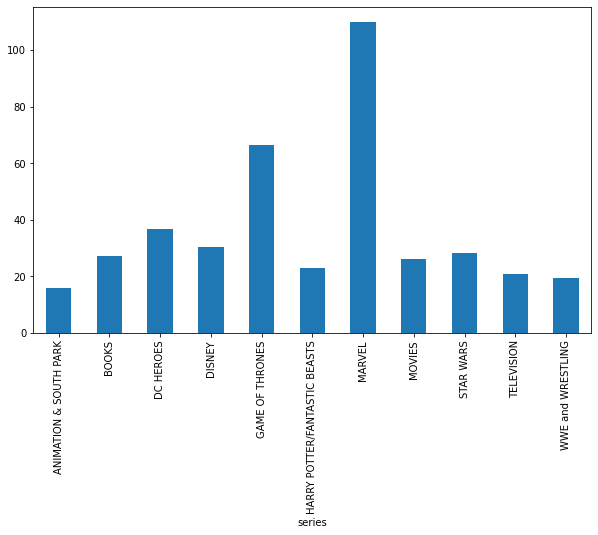

In [238]:
df = pd.read_csv("funko_pop_database2.csv")
#fig,ax = plt.subplots(1, len(df.index), figsize=(20, 5))
arrdf = df.groupby(["series"]).mean()["current price"]
print(arrdf)
arrdf.plot(x="series",y="avrg",kind="bar")


גרף מחירים ממוצעים לפי מאפיין

exclusive       44.129630
chase           44.303468
convention     184.098851
size            53.338521
regular pop     34.811784
dtype: float64


<AxesSubplot:>

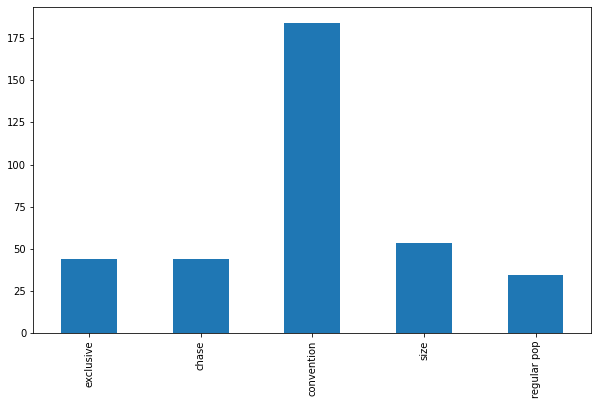

In [341]:
df = pd.read_csv("funko_pop_database2.csv")
arrdf = df.groupby(["exclusive"]).mean()["current price"]
arrdf2 = df.groupby(["chase"]).mean()["current price"]
arrdf3 = df.groupby(["convention"]).mean()["current price"]
arrdf4 = df.groupby(["size"]).mean()["current price"]
newDf = pd.DataFrame({"new":df["exclusive"]+df["chase"]+df["convention"]+df["size"]})
newDf["current price"] = df["current price"]
arrdf5 = newDf.groupby(["new"]).mean()["current price"]
arr = []
#arrdf.iloc[1].append(arrdf2.iloc[1])
arr.append(arrdf.iloc[1])
arr.append(arrdf2.iloc[1])
arr.append(arrdf3.iloc[1])
arr.append(arrdf4.iloc[1])
arr.append(arrdf5.iloc[0])

#print(arrdf2.iloc[1])
arrdf = pd.Series(arr)

arrdf = arrdf.rename(index={0: 'exclusive',1 : 'chase', 2 : 'convention', 3 : 'size',4:"regular pop"})

print(arrdf)
arrdf.plot(x="ex",y="avrg",kind="bar")
#print(arrdf)

הפיכת הלייבלים לממוצעים
לקחנו את כל המאפיינים ובדקנו ממוצע לפי המחיר הנוכחי לכל אחד מהם
והחלפנו אותם בטבלה
בשבל הרגרסיה הליניארית היינו חייבים להפוך את המשתנים המספריים(אפס או אחד) למשתנים רציפים
בעזרת השינוי הרגרסיה תדע מה המשקל של כל משתנה על התוצאה הסופית

In [298]:
df = pd.read_csv("funko_pop_database_after_label.csv")
#series,original,chase,convention,exclusive,size,age
def predictPrice():
    series = df.groupby(["series"]).mean()["current price"]
    subseries = df.groupby(["subseries"]).mean()["current price"]
    chase = df.groupby(["chase"]).mean()["current price"]
    convention = df.groupby(["convention"]).mean()["current price"]
    exclusive = df.groupby(["exclusive"]).mean()["current price"]
    size = df.groupby(["size"]).mean()["current price"]
    for ele in df.index:
        df.iloc[ele,5] = series[df.iloc[ele,5]]
        df.iloc[ele,6] = subseries[df.iloc[ele,6]]
        df.iloc[ele,8] = chase[df.iloc[ele,8]]
        df.iloc[ele,9] = convention[df.iloc[ele,9]]
        df.iloc[ele,10] = exclusive[df.iloc[ele,10]]
        df.iloc[ele,11] = size[df.iloc[ele,11]]
    

        
        
    
    
    
        
    return 0
    
    
    
    
    
    
print(df)
predictPrice()    
df    
df.to_csv("funko_pop_database_final_label_mean.csv")    
    
    

      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 num  \
0              0             0               0  01   
1              1             1               1  02   
2              2             2               2  03   
3              3             3               3  03   
4              4             4               4  03   
...          ...           ...             ...  ..   
6181        6181          6181            6181  02   
6182        6182          6182            6182  02   
6183        6183          6183            6183  02   
6184        6184          6184            6184  03   
6185        6185          6185            6185  04   

                                   name  series  subseries  original price  \
0                                  Thor       1          1              10   
1                                  Loki       1          1              10   
2                           Spider -man       1          1              10   
3             B&W Spider -man(Fugitive)

רגרסיה ליניארית
יצרנו שתי טבלאות חדשות
טבלה XTRAIN
טלה YTRAIN
אשר מורכבות מהמאפיינים ועשינו להם FIT
ויצרנו את הפונקציה PREDICTPRICE
הפוקנציה מקבלת את המאפיינים אותם יש לנו ואנחנו רוצים לחזות בעזרתם את המחיר העתידי של הפופ
הפונקציה מקבלת את המערך והמשתנה מפונקצית הFIT
הפונקציה מחשבת את הממוצעים של הערכים השונים ובעזרת המשתנים שמקבלת יודעת לבצע את החישוב של החיזוי


In [347]:
df = pd.read_csv("funko_pop_database_final_label_mean.csv")
print(df)

lr = linear_model.LinearRegression() # create a linear regression object

x = df[['series',"subseries","size","original price","age","chase","convention","exclusive","size"]]
#print(x)
y = df['current price']
#print(y)

lr.fit(X=x, y=y);


print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)



#series,original,chase,convention,exclusive,size,age
def predictPrice(arr,x0,seriesX,subseriesX,originalX,chaseX,conventionX,exclusiveX,sizeX,ageX):
    df = pd.read_csv("funko_pop_database_final_label.csv")
    series = df.groupby(["series"]).mean()["current price"]
    subseries = df.groupby(["subseries"]).mean()["current price"]
    chase = df.groupby(["chase"]).mean()["current price"]
    convention = df.groupby(["convention"]).mean()["current price"]
    exclusive = df.groupby(["exclusive"]).mean()["current price"]
    size = df.groupby(["size"]).mean()["current price"]
    
    
    
    return (arr[0]*series[seriesX]+
            arr[1]*subseries[subseriesX]+
            arr[2]*originalX+
            arr[3]*chase[chaseX]+
            arr[4]*convention[conventionX]+
            arr[5]*exclusive[exclusiveX]+
            arr[6]*size[sizeX]+
            arr[7]*ageX + x0)


print("\nprice predict:")#seriesX,subseriesX,originalX,chaseX,conventionX,exclusiveX,sizeX,ageX
predictPrice(lr.coef_,lr.intercept_,1,1,10,1,0,1,0,11)

      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1 num  \
0              0             0               0                 0  01   
1              1             1               1                 1  02   
2              2             2               2                 2  03   
3              3             3               3                 3  03   
4              4             4               4                 4  03   
...          ...           ...             ...               ...  ..   
6181        6181          6181            6181              6181  02   
6182        6182          6182            6182              6182  02   
6183        6183          6183            6183              6183  02   
6184        6184          6184            6184              6184  03   
6185        6185          6185            6185              6185  04   

                                   name      series  subseries  \
0                                  Thor  109.744326  98.661202   
1  

257.35210842318463